In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [2]:
df = pd.read_csv('Superstore.csv', encoding='latin-1')

# Data Cleaning 

## Verifying datatypes
all datatypes are correct

In [4]:
# making sure datatypes make sense
df.dtypes



Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

## identifying NaN values
no NaN values are present in the dataset

In [5]:
df.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Identifying impossible values 
No values in Sales and Quantity are <= 0

In [65]:
df[df['Sales']<= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Full Price,Full Price per item


In [67]:
df[df['Quantity']<= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Full Price,Full Price per item


In [56]:
price_quantile_95 = df['Full Price per item'].quantile(0.95)
df_expns_products = df[df['Full Price per item']> price_quantile_95] 
df_expns_products['Sub-Category'].unique()

array(['Machines', 'Copiers', 'Binders', 'Supplies', 'Phones', 'Chairs',
       'Bookcases', 'Tables', 'Storage', 'Appliances', 'Accessories'],
      dtype=object)

In [58]:
for subCat in df_expns_products['Sub-Category'].unique():
    print(subCat)
    print(df_expns_products.loc[df_expns_products['Sub-Category'] == subCat, 'Product Name'].unique())
    print()

Machines
['Cisco TelePresence System EX90 Videoconferencing Unit'
 '3D Systems Cube Printer, 2nd Generation, Magenta'
 'HP Designjet T520 Inkjet Large Format Printer - 24" Color'
 'Lexmark MX611dhe Monochrome Laser Printer'
 'Cubify CubeX 3D Printer Triple Head Print'
 'Ativa V4110MDD Micro-Cut Shredder'
 'Cubify CubeX 3D Printer Double Head Print'
 'Zebra ZM400 Thermal Label Printer' 'Okidata MB760 Printer'
 'Bady BDG101FRU Card Printer'
 'Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier'
 'Hewlett-Packard Desktjet 6988DT Refurbished Printer'
 'Cisco 9971 IP Video Phone Charcoal'
 'Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer'
 'Zebra GX420t Direct Thermal/Thermal Transfer Printer'
 'Xerox WorkCentre 6505DN Laser Multifunction Printer'
 'Okidata MB491 Multifunction Printer' 'Okidata C610n Printer'
 'Panasonic KX MC6040 Color Laser Multifunction Printer'
 '3D Systems Cube Printer, 2nd Generation, White'
 'Swingline SM12-08 MicroCut Jam Free Shredde

In [61]:
price_quantile_05 = df['Full Price per item'].quantile(0.05)
df_cheap_products = df[df['Full Price per item']< price_quantile_05] 
df_cheap_products['Sub-Category'].unique()

array(['Art', 'Furnishings', 'Labels', 'Fasteners', 'Binders',
       'Envelopes', 'Paper', 'Supplies', 'Phones', 'Accessories',
       'Appliances'], dtype=object)

In [63]:
for subCat in df_cheap_products['Sub-Category'].unique():
    print(subCat)
    print(df_cheap_products.loc[df_cheap_products['Sub-Category'] == subCat, 'Product Name'].unique())
    print()

Art
['Sanford Uni-Blazer View Highlighters, Chisel Tip, Yellow'
 'Rogers Handheld Barrel Pencil Sharpener'
 'Binney & Smith inkTank Desk Highlighter, Chisel Tip, Yellow, 12/Box'
 'Prang Drawing Pencil Set' 'Newell 327' 'Newell 318' 'Newell 333'
 'Blackstonian Pencils' 'DIXON Oriole Pencils'
 'Crayola Anti Dust Chalk, 12/Pack' 'Staples in misc. colors'
 'Binney & Smith inkTank Erasable Pocket Highlighter, Chisel Tip, Yellow'
 'Newell 311' 'Sanford EarthWrite Recycled Pencils, Medium Soft, #2'
 'Newell 339' 'Newell 344' 'Newell 310' 'Pencil and Crayon Sharpener'
 'American Pencil' 'Nontoxic Chalk' 'Newell 326'
 'Sanford Pocket Accent Highlighters' 'Economy #2 Pencils' 'Newell 307'
 'Prang Dustless Chalk Sticks' 'Newell 323' 'OIC #2 Pencils, Medium Soft'
 'BIC Brite Liner Grip Highlighters' 'Quartet Alpha White Chalk, 12/Pack'
 '4009 Highlighters' '12 Colored Short Pencils'
 'Binney & Smith inkTank Erasable Desk Highlighter, Chisel Tip, Yellow, 12/Box'
 'Newell 322' 'Newell 32' 'Sanford C

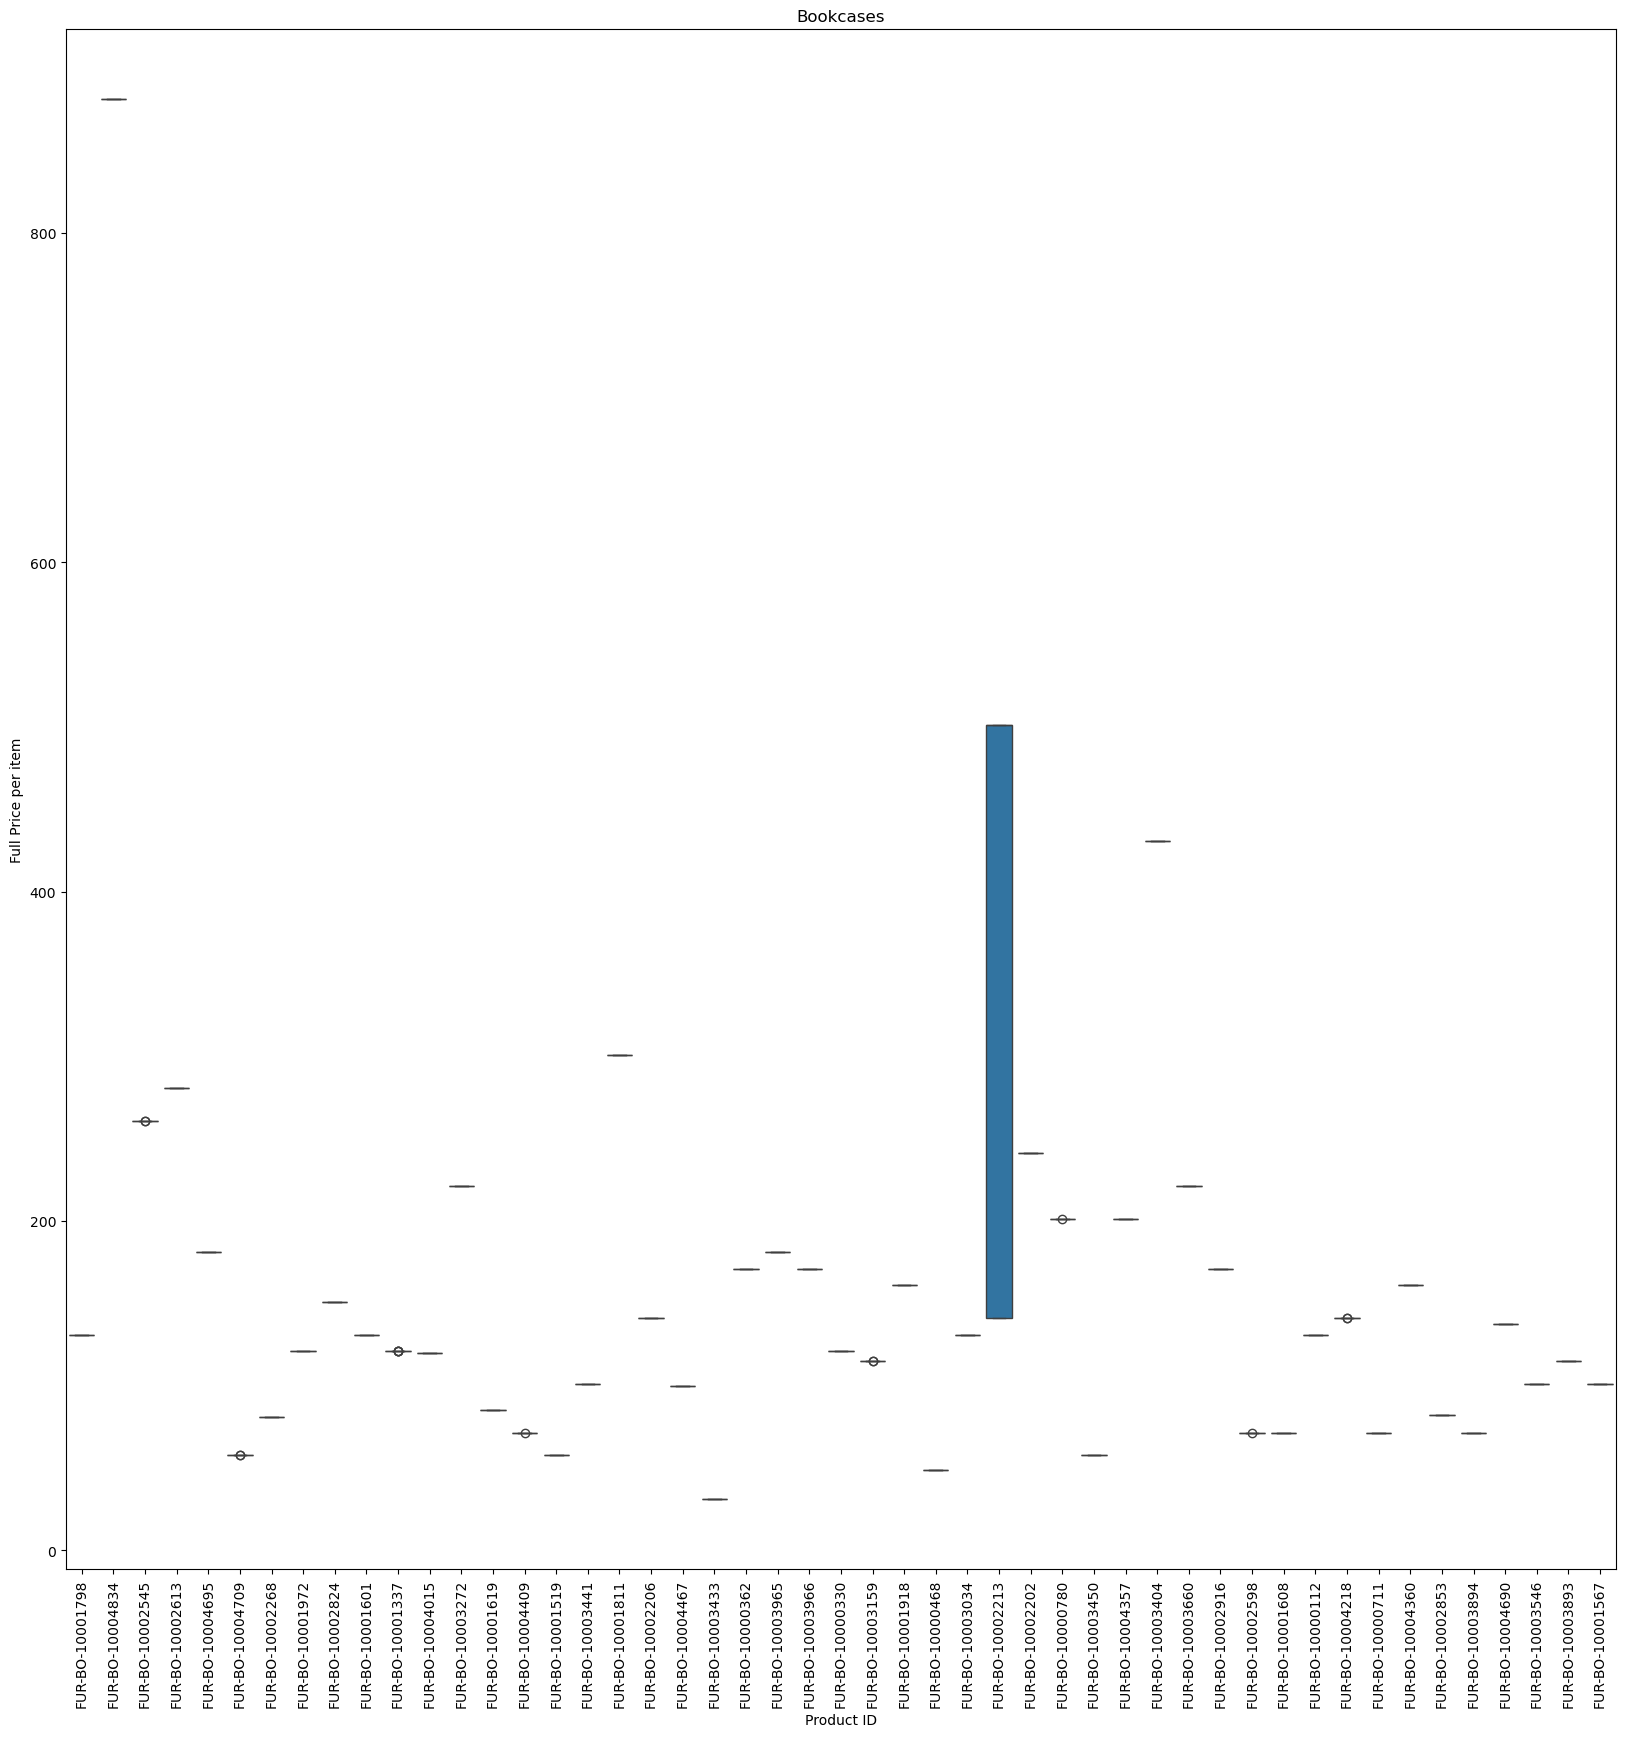

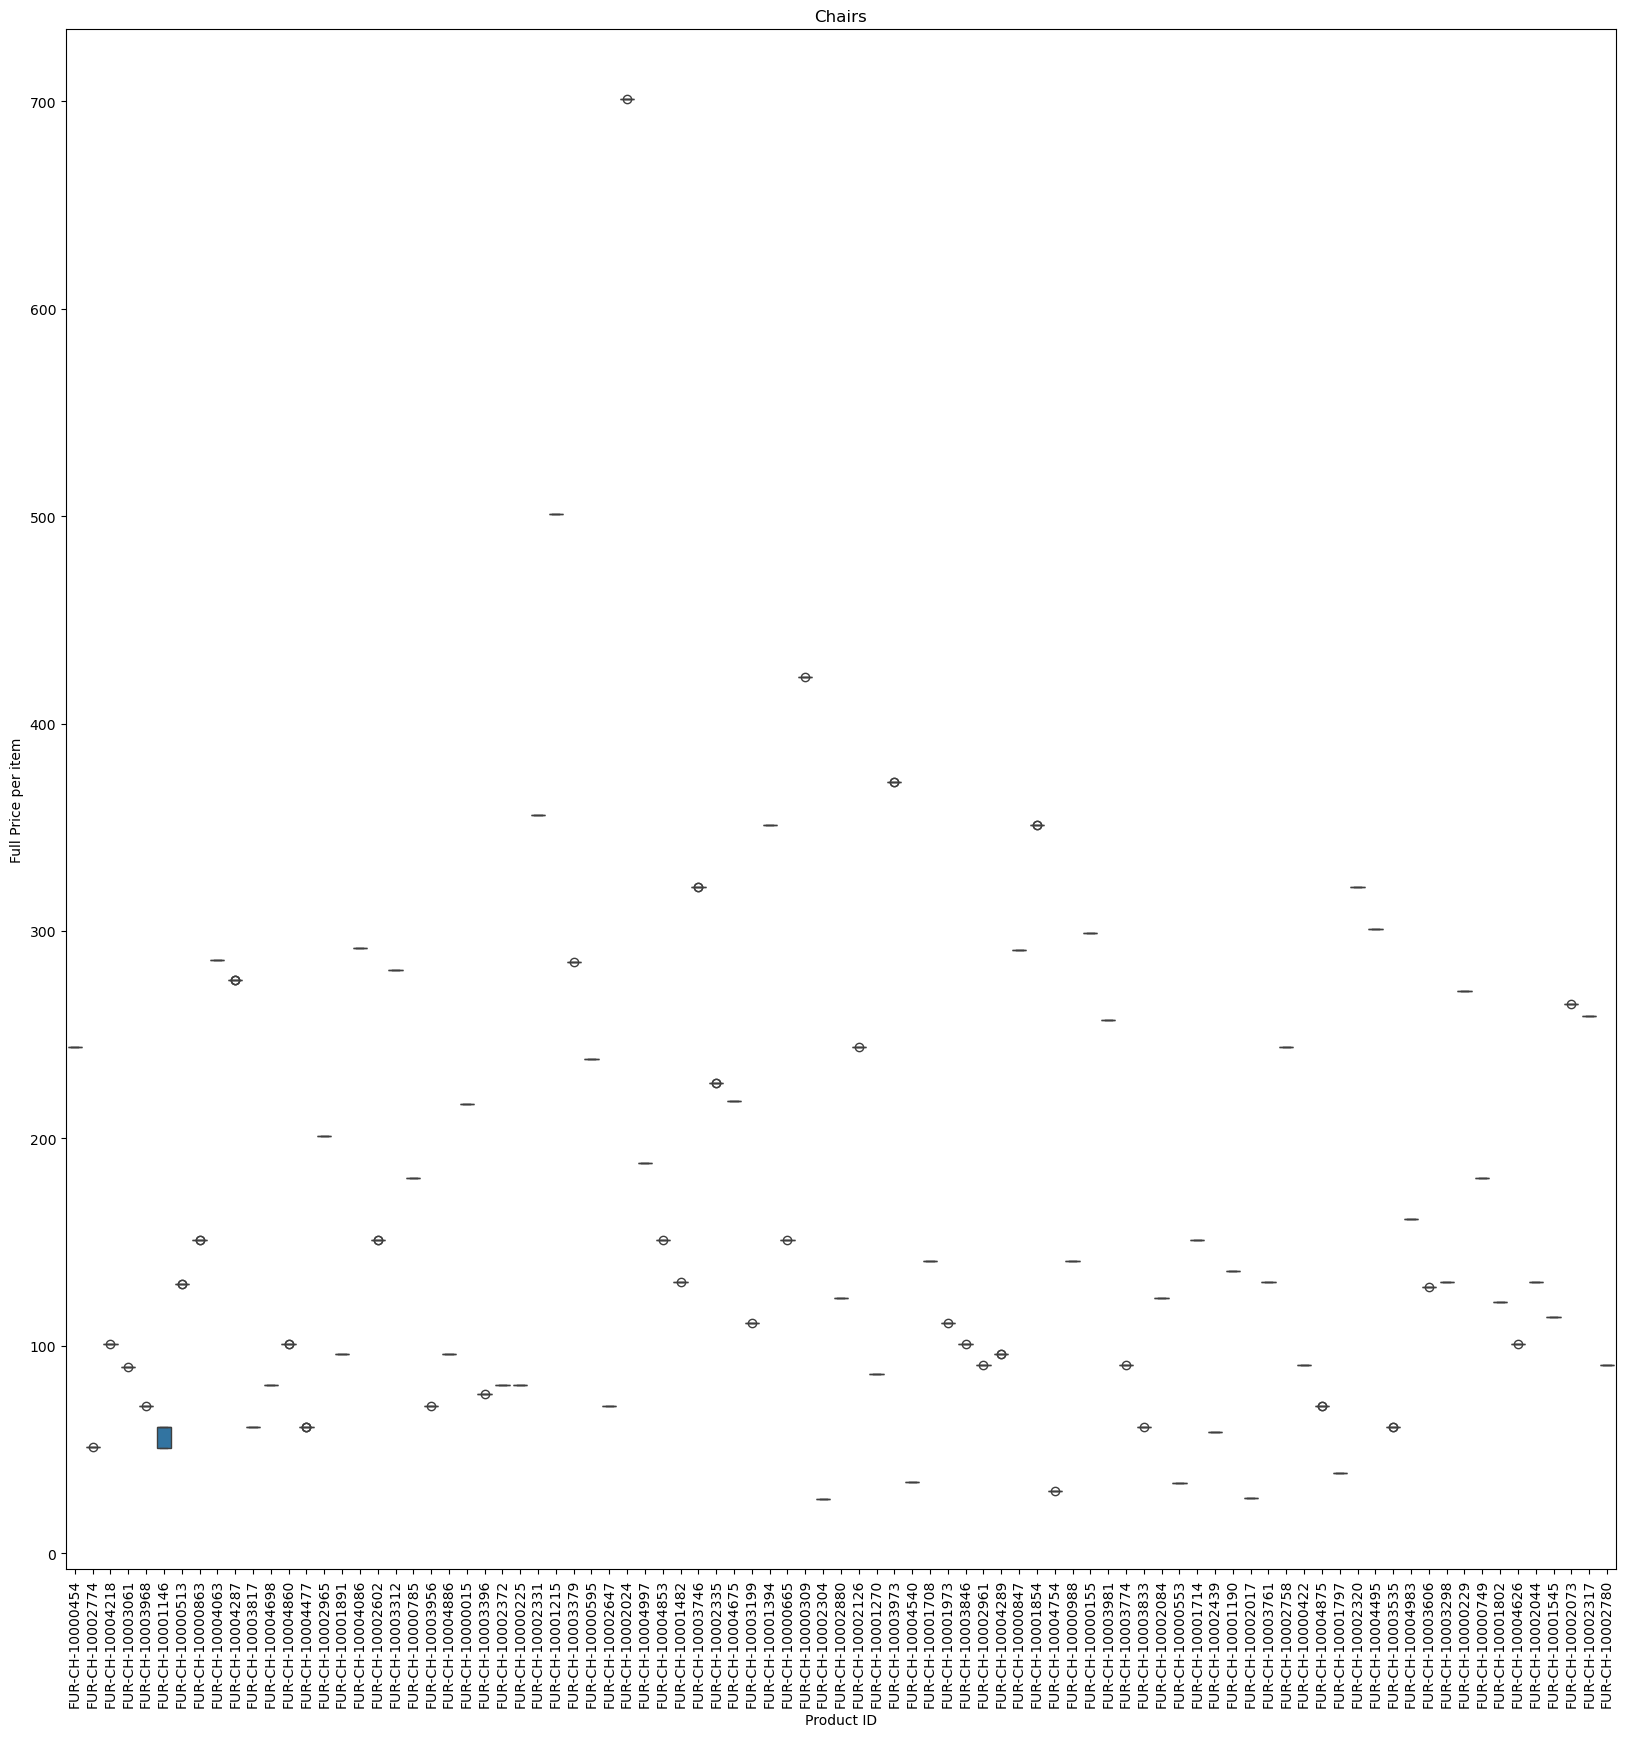

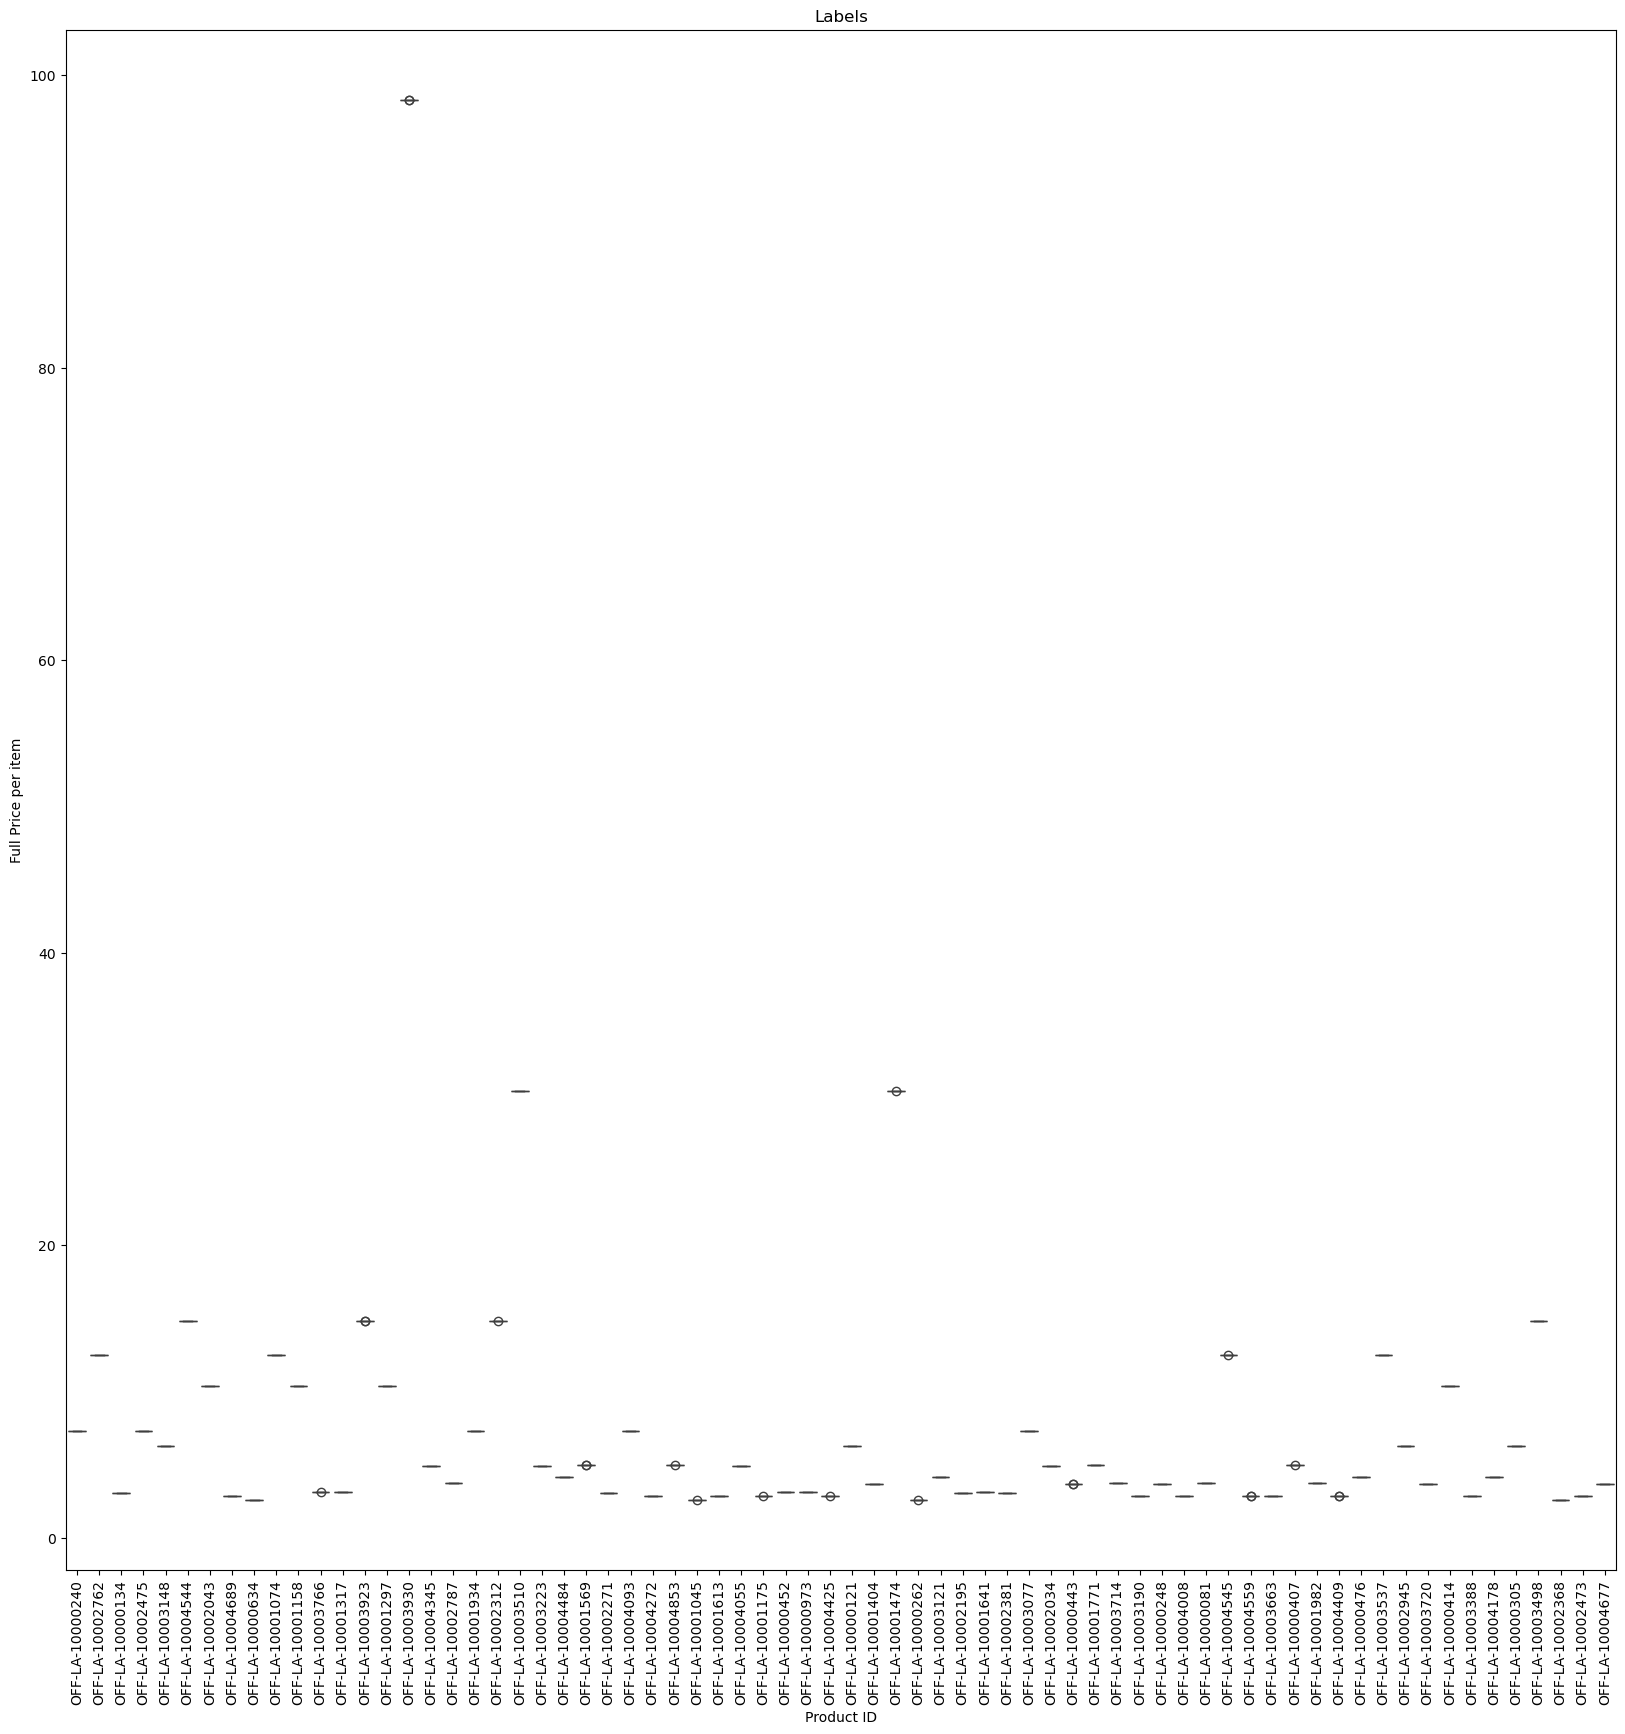

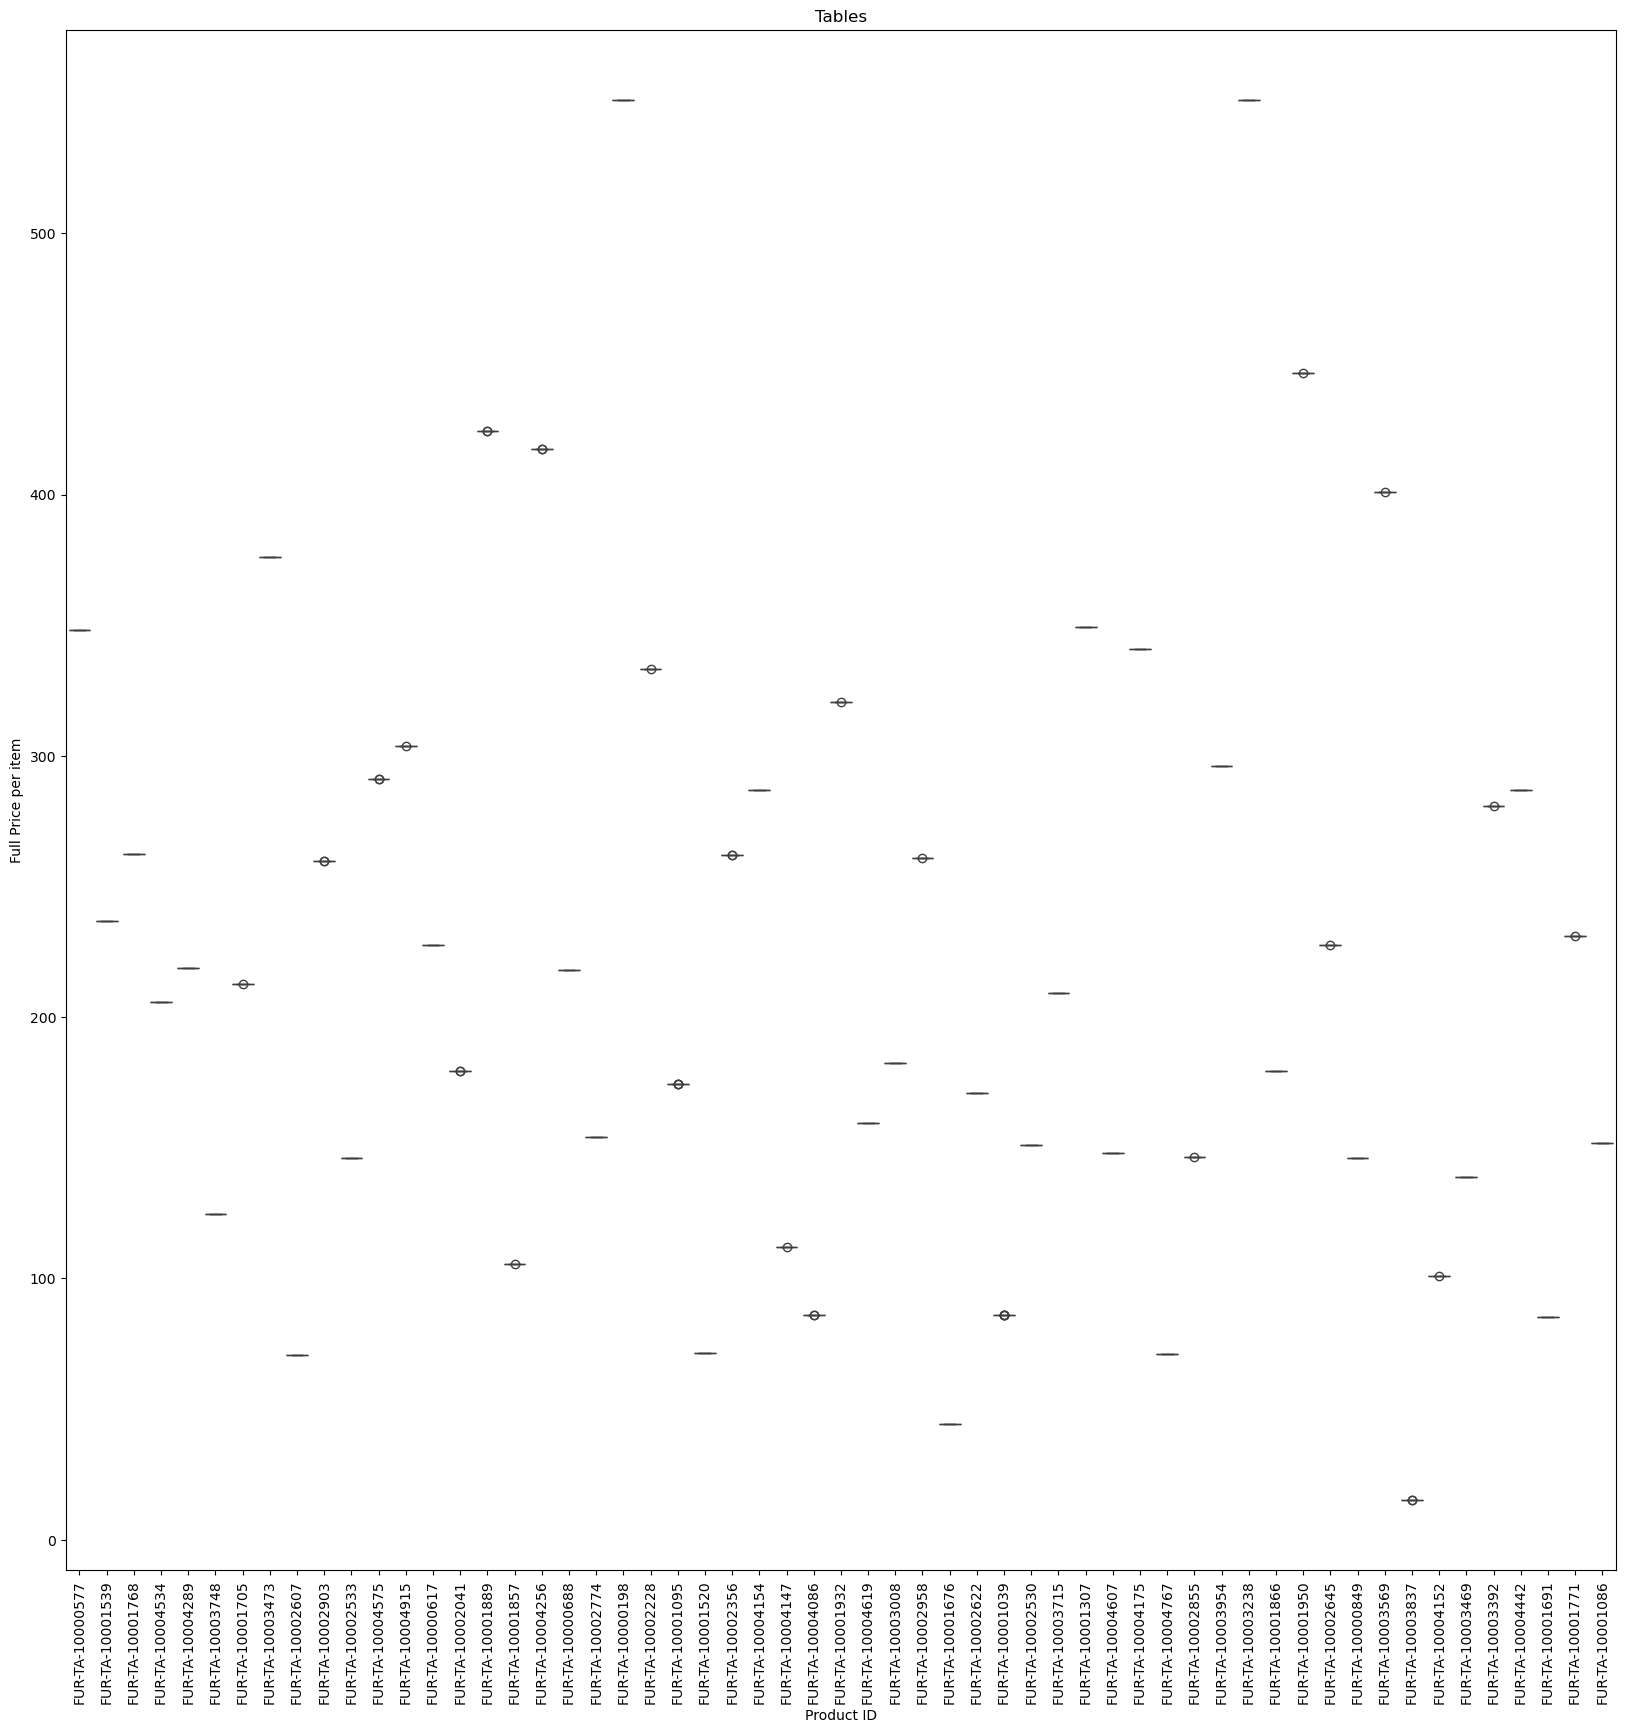

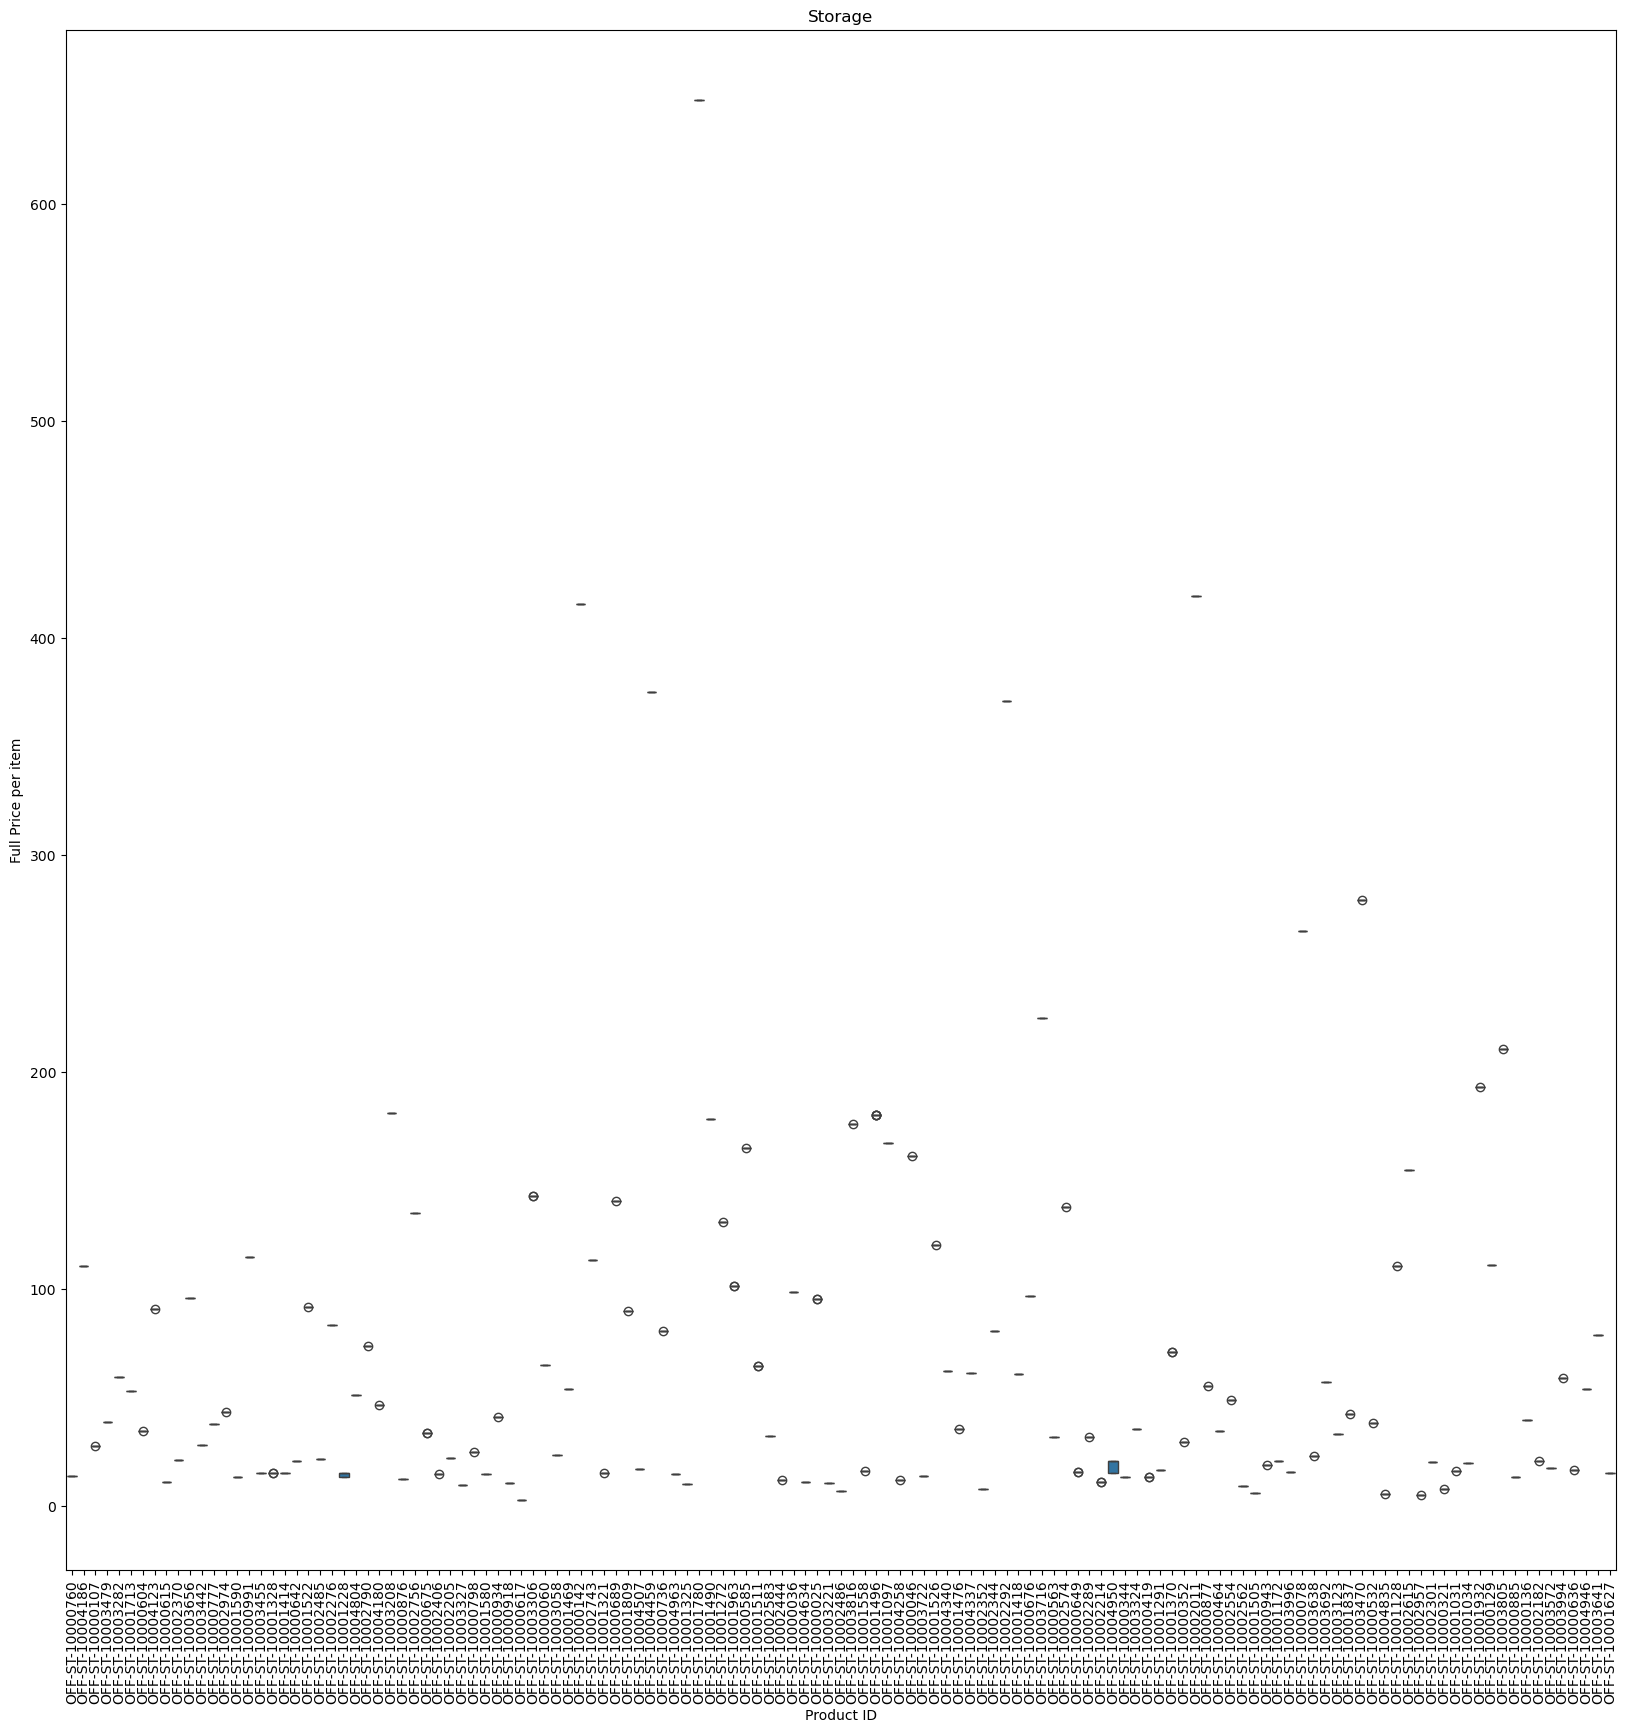

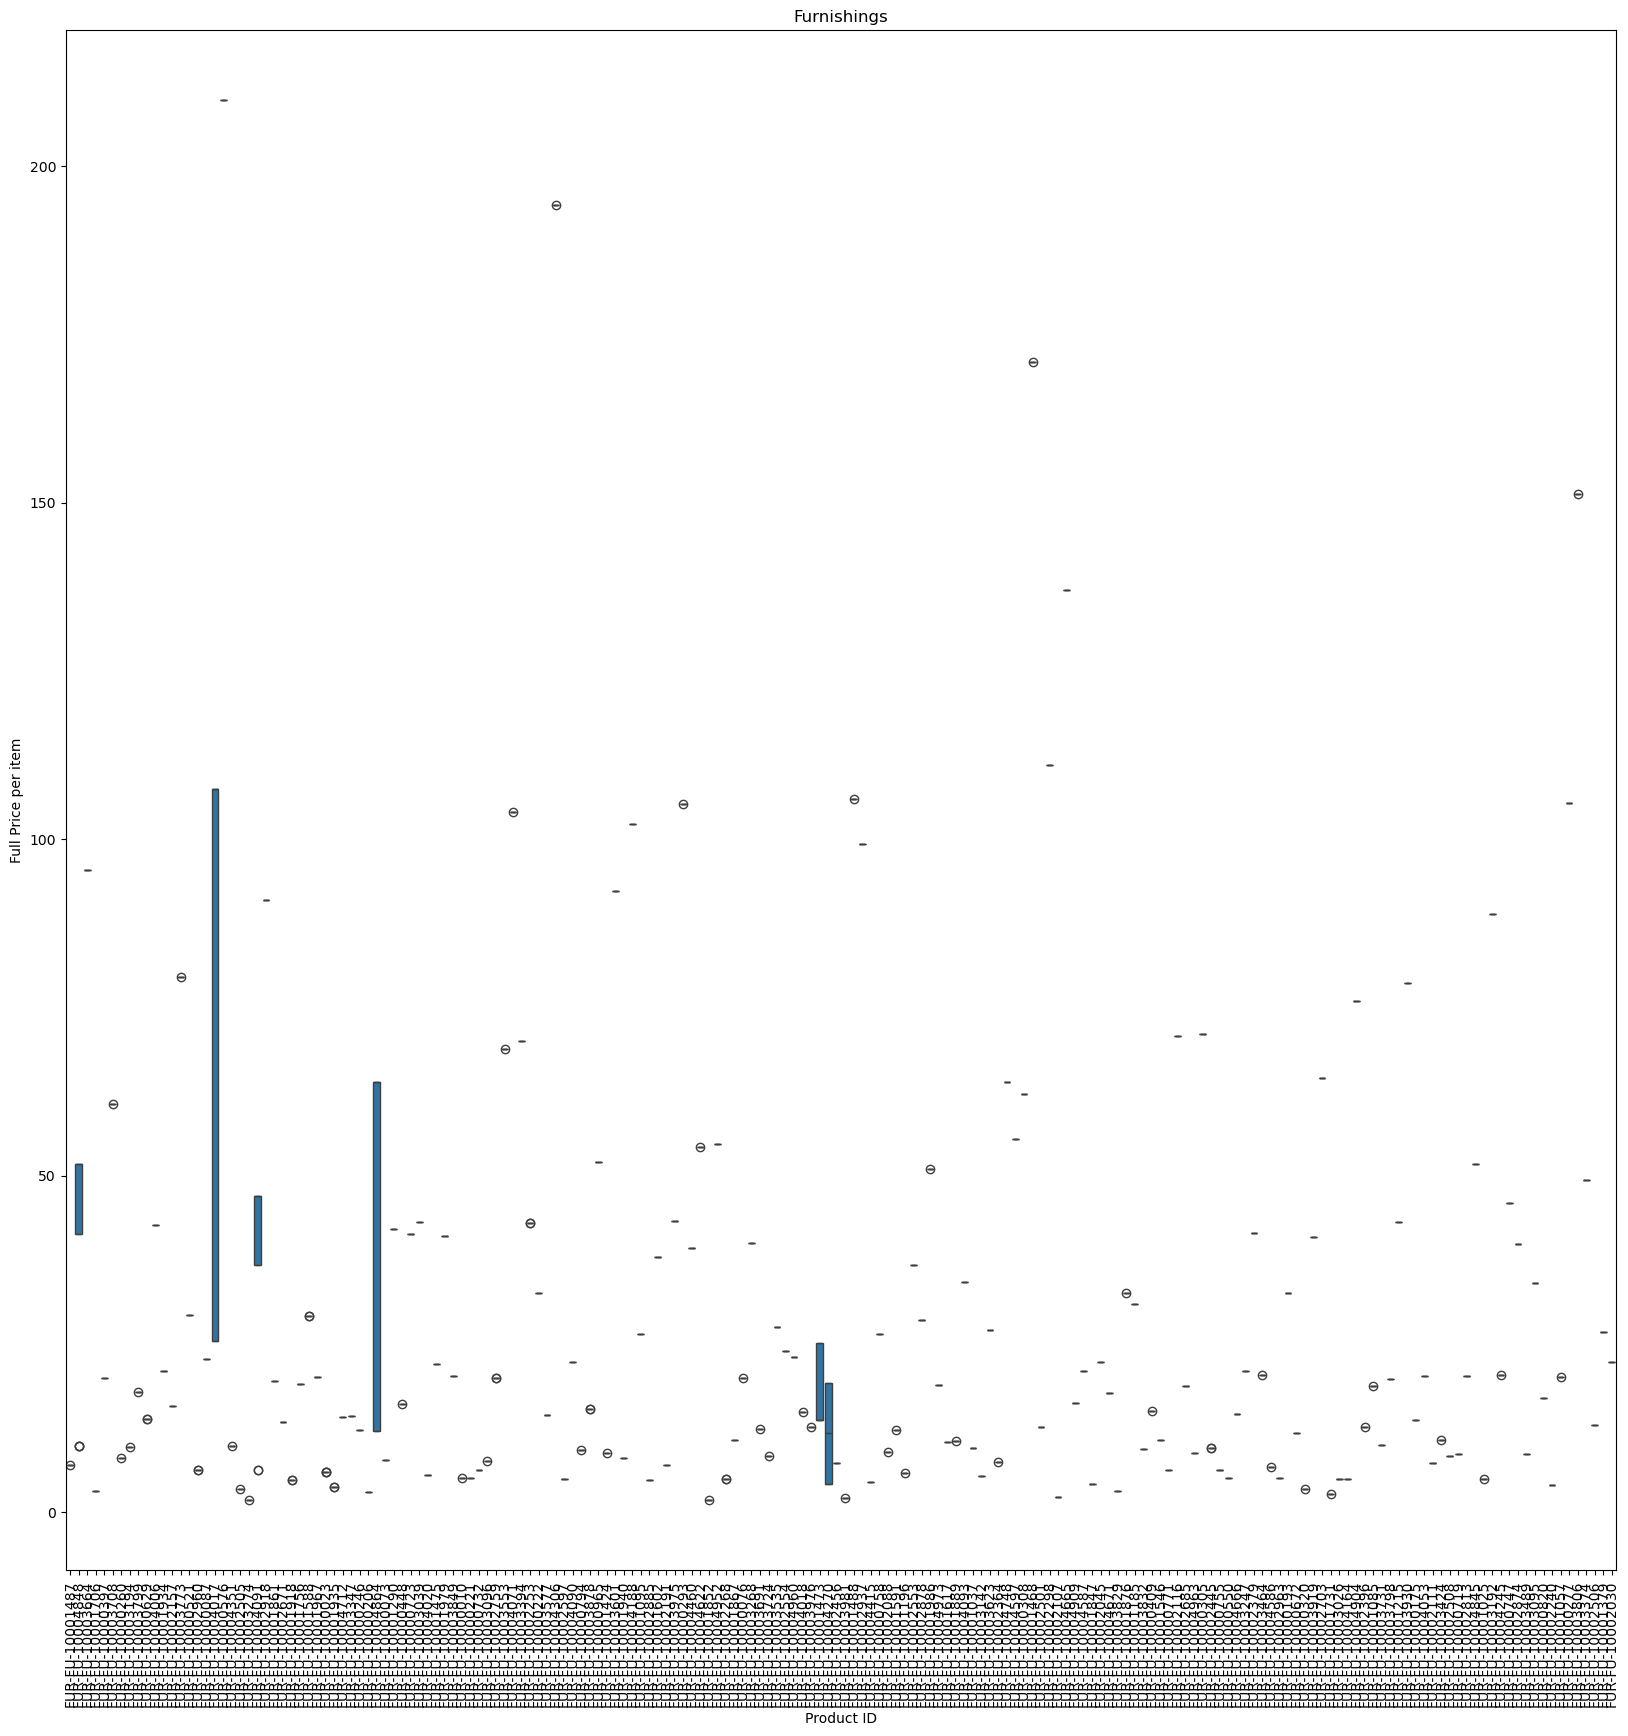

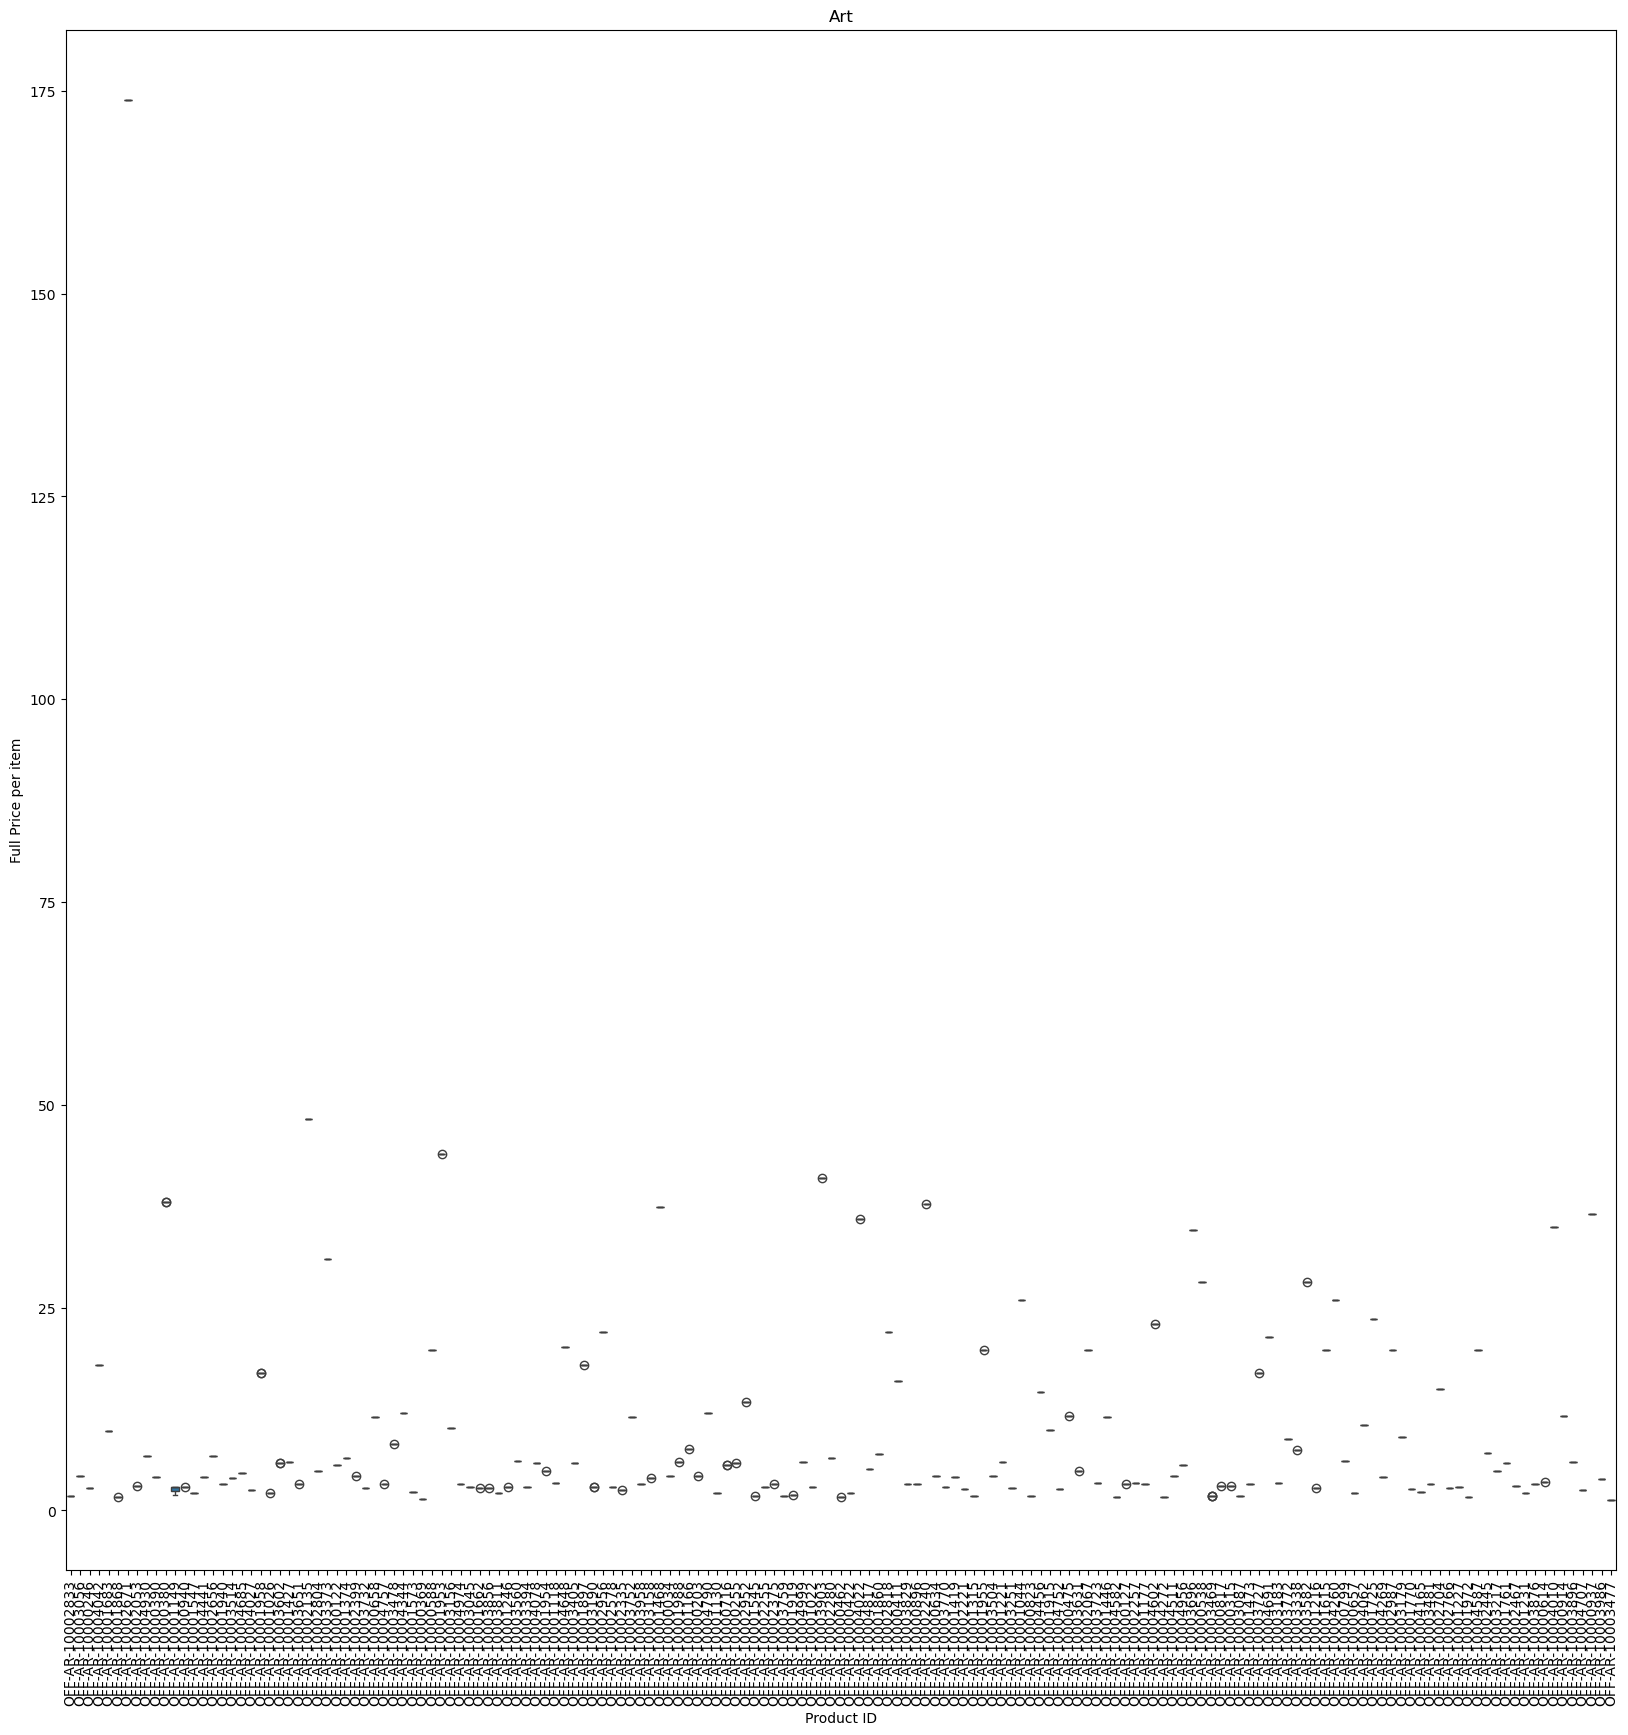

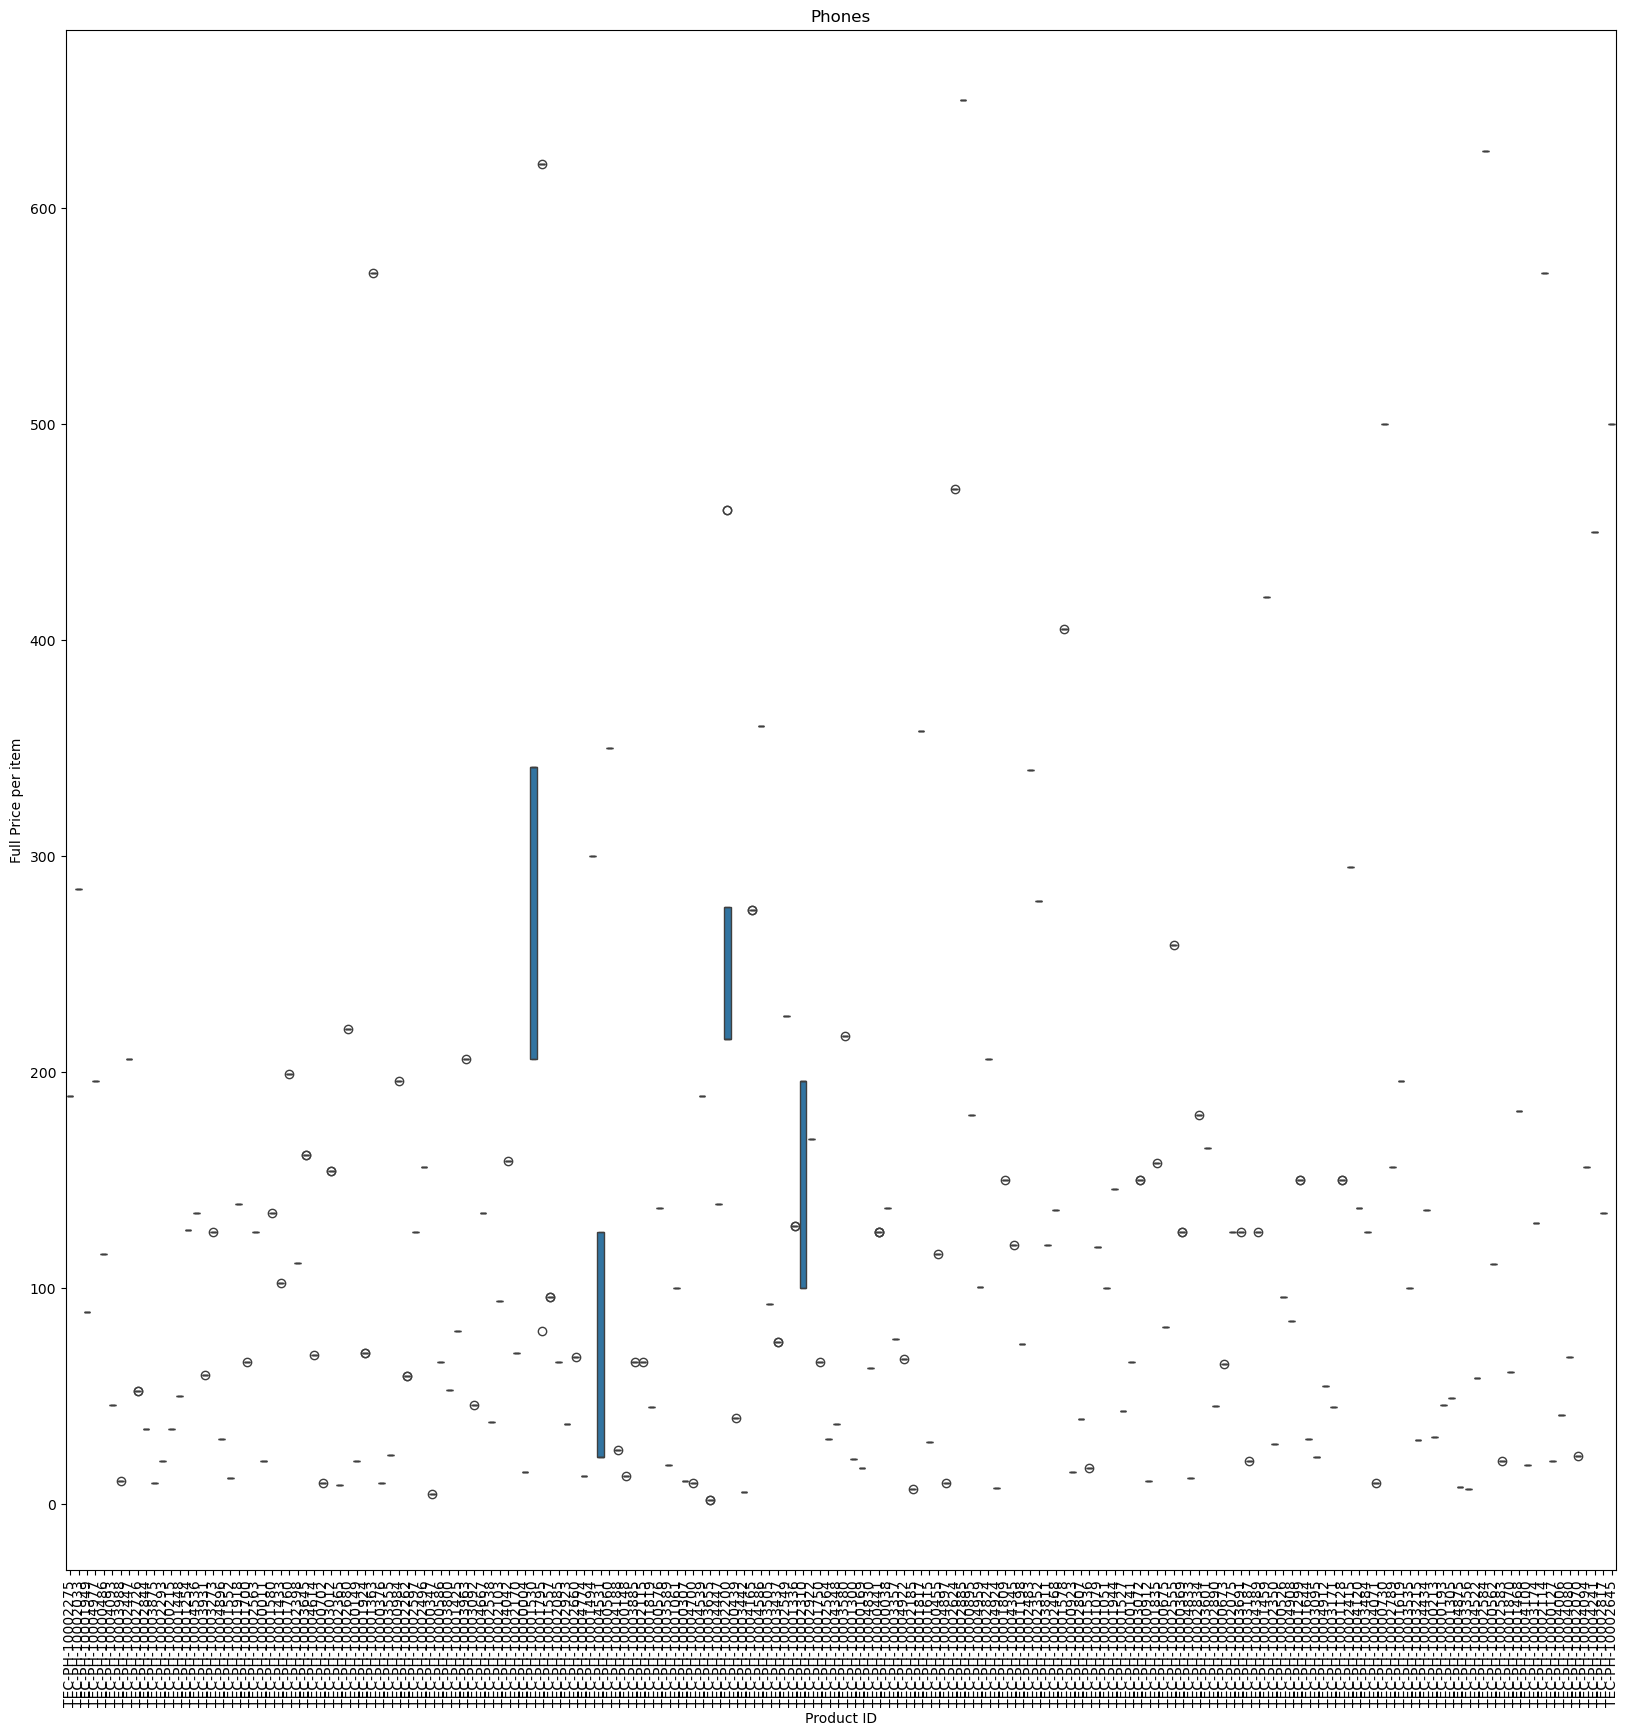

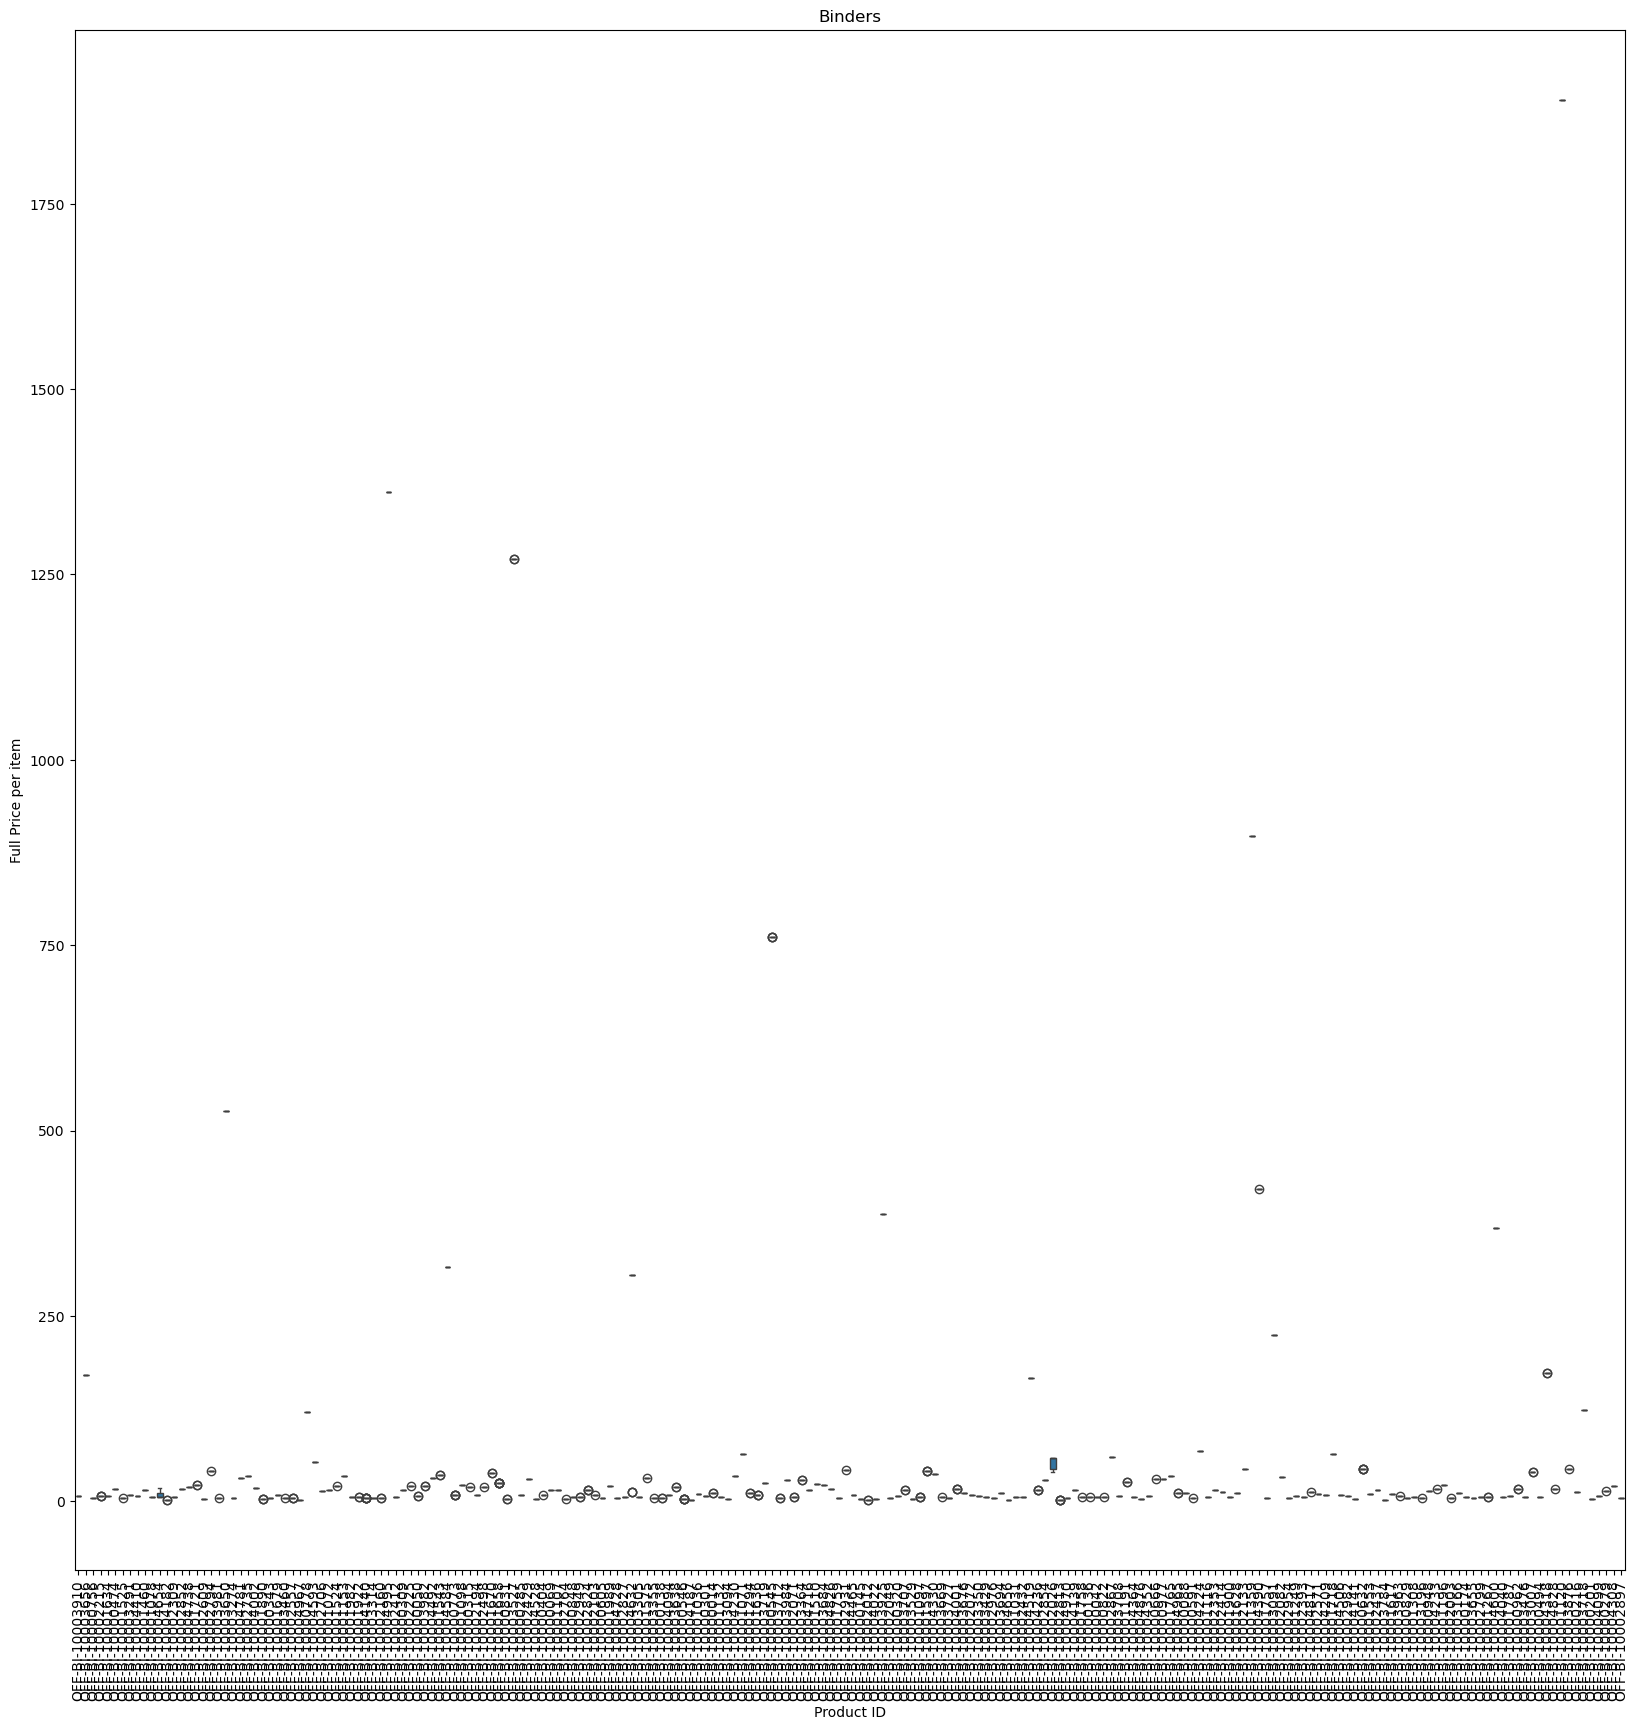

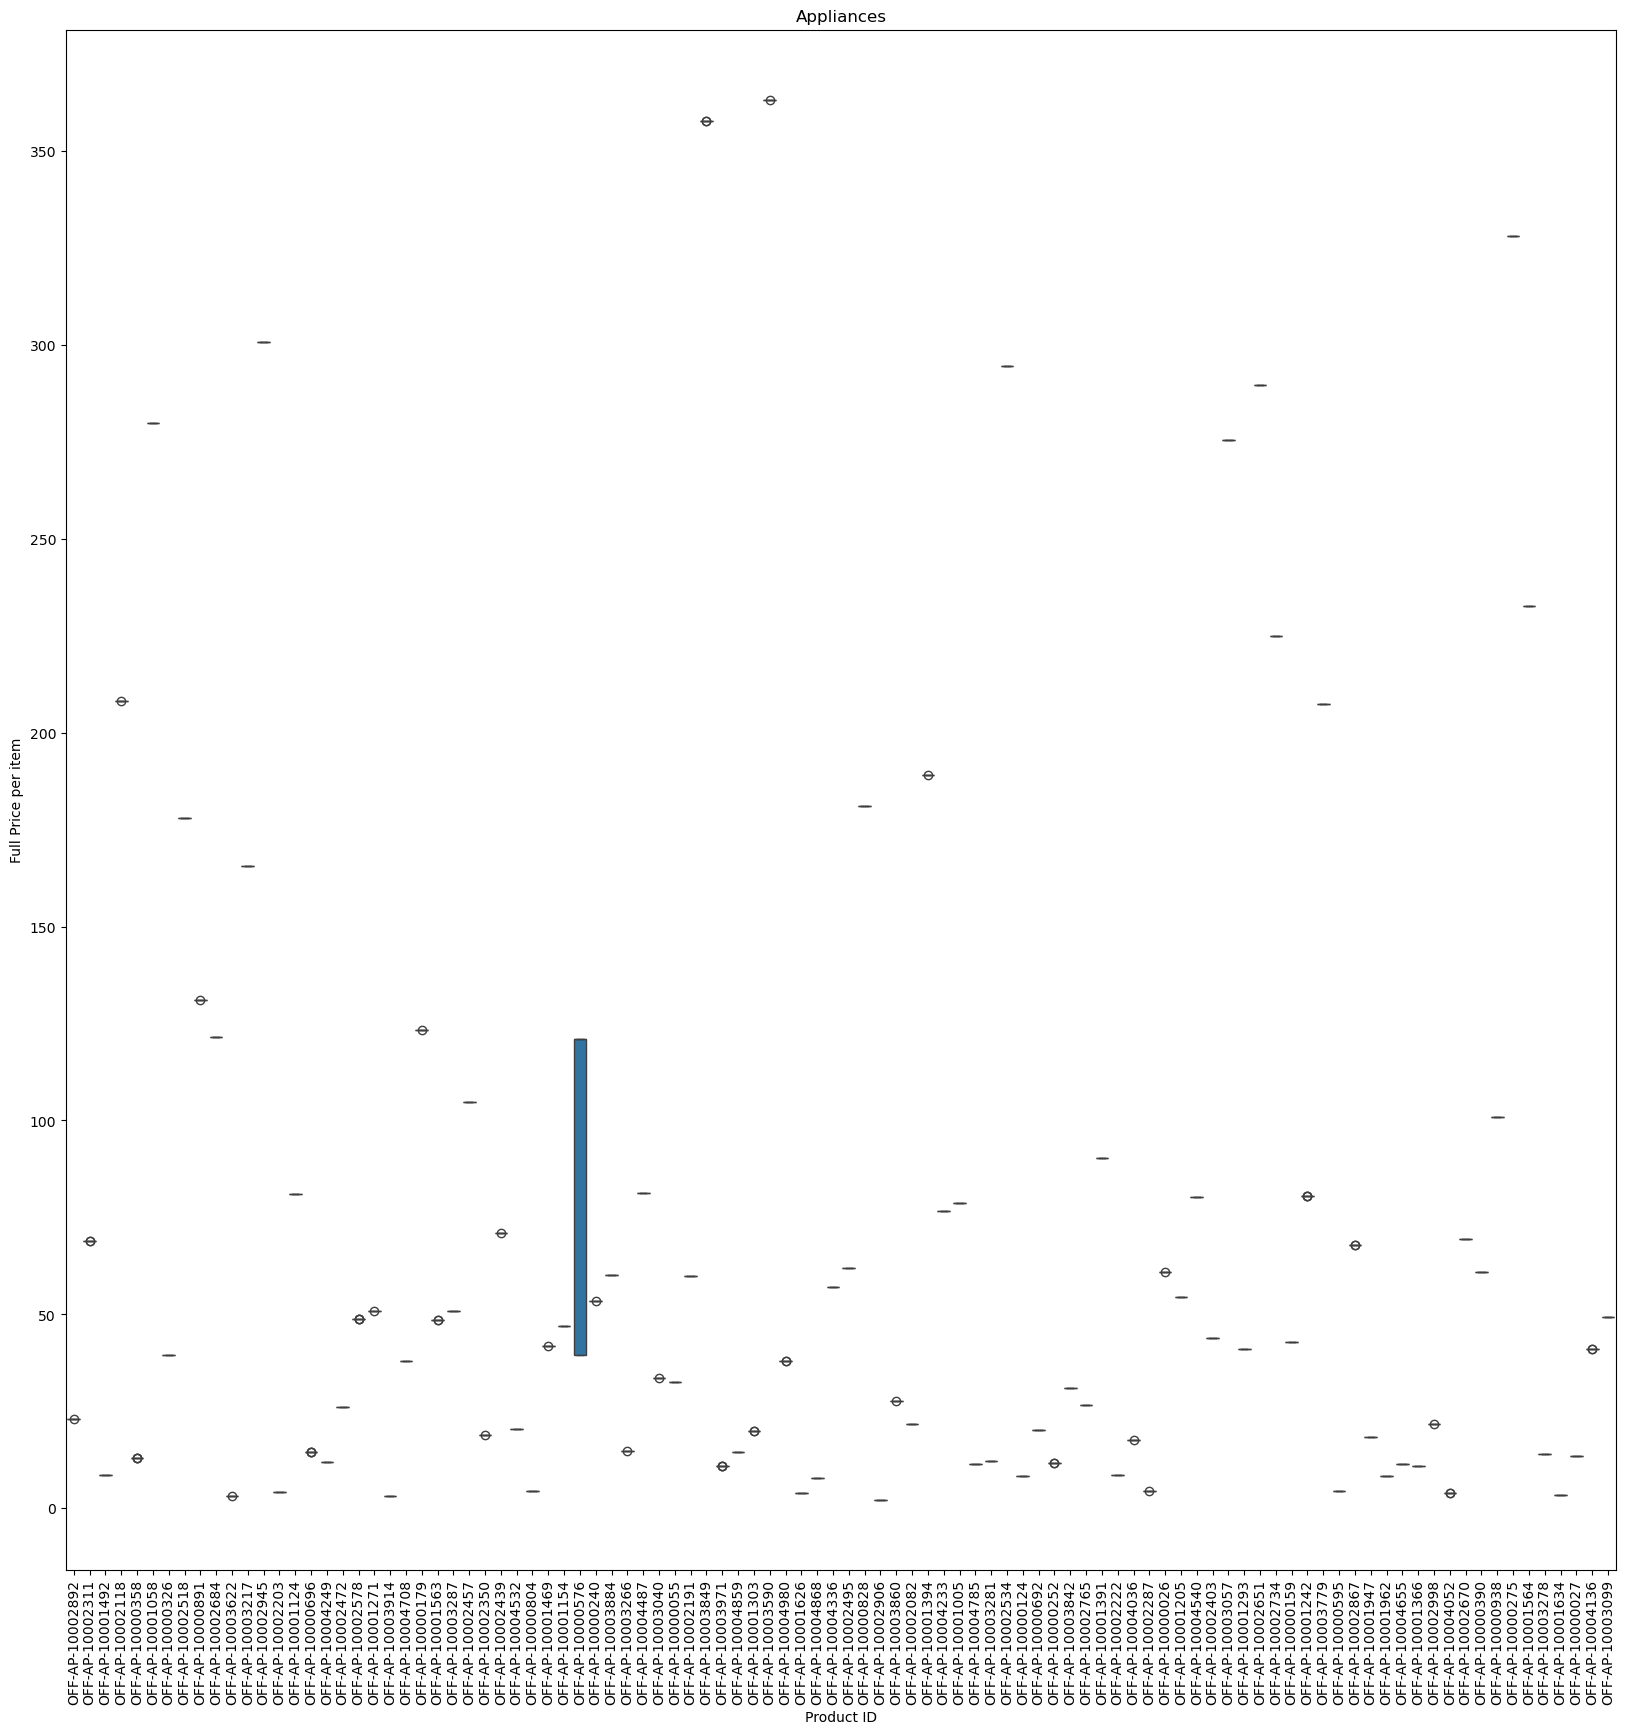

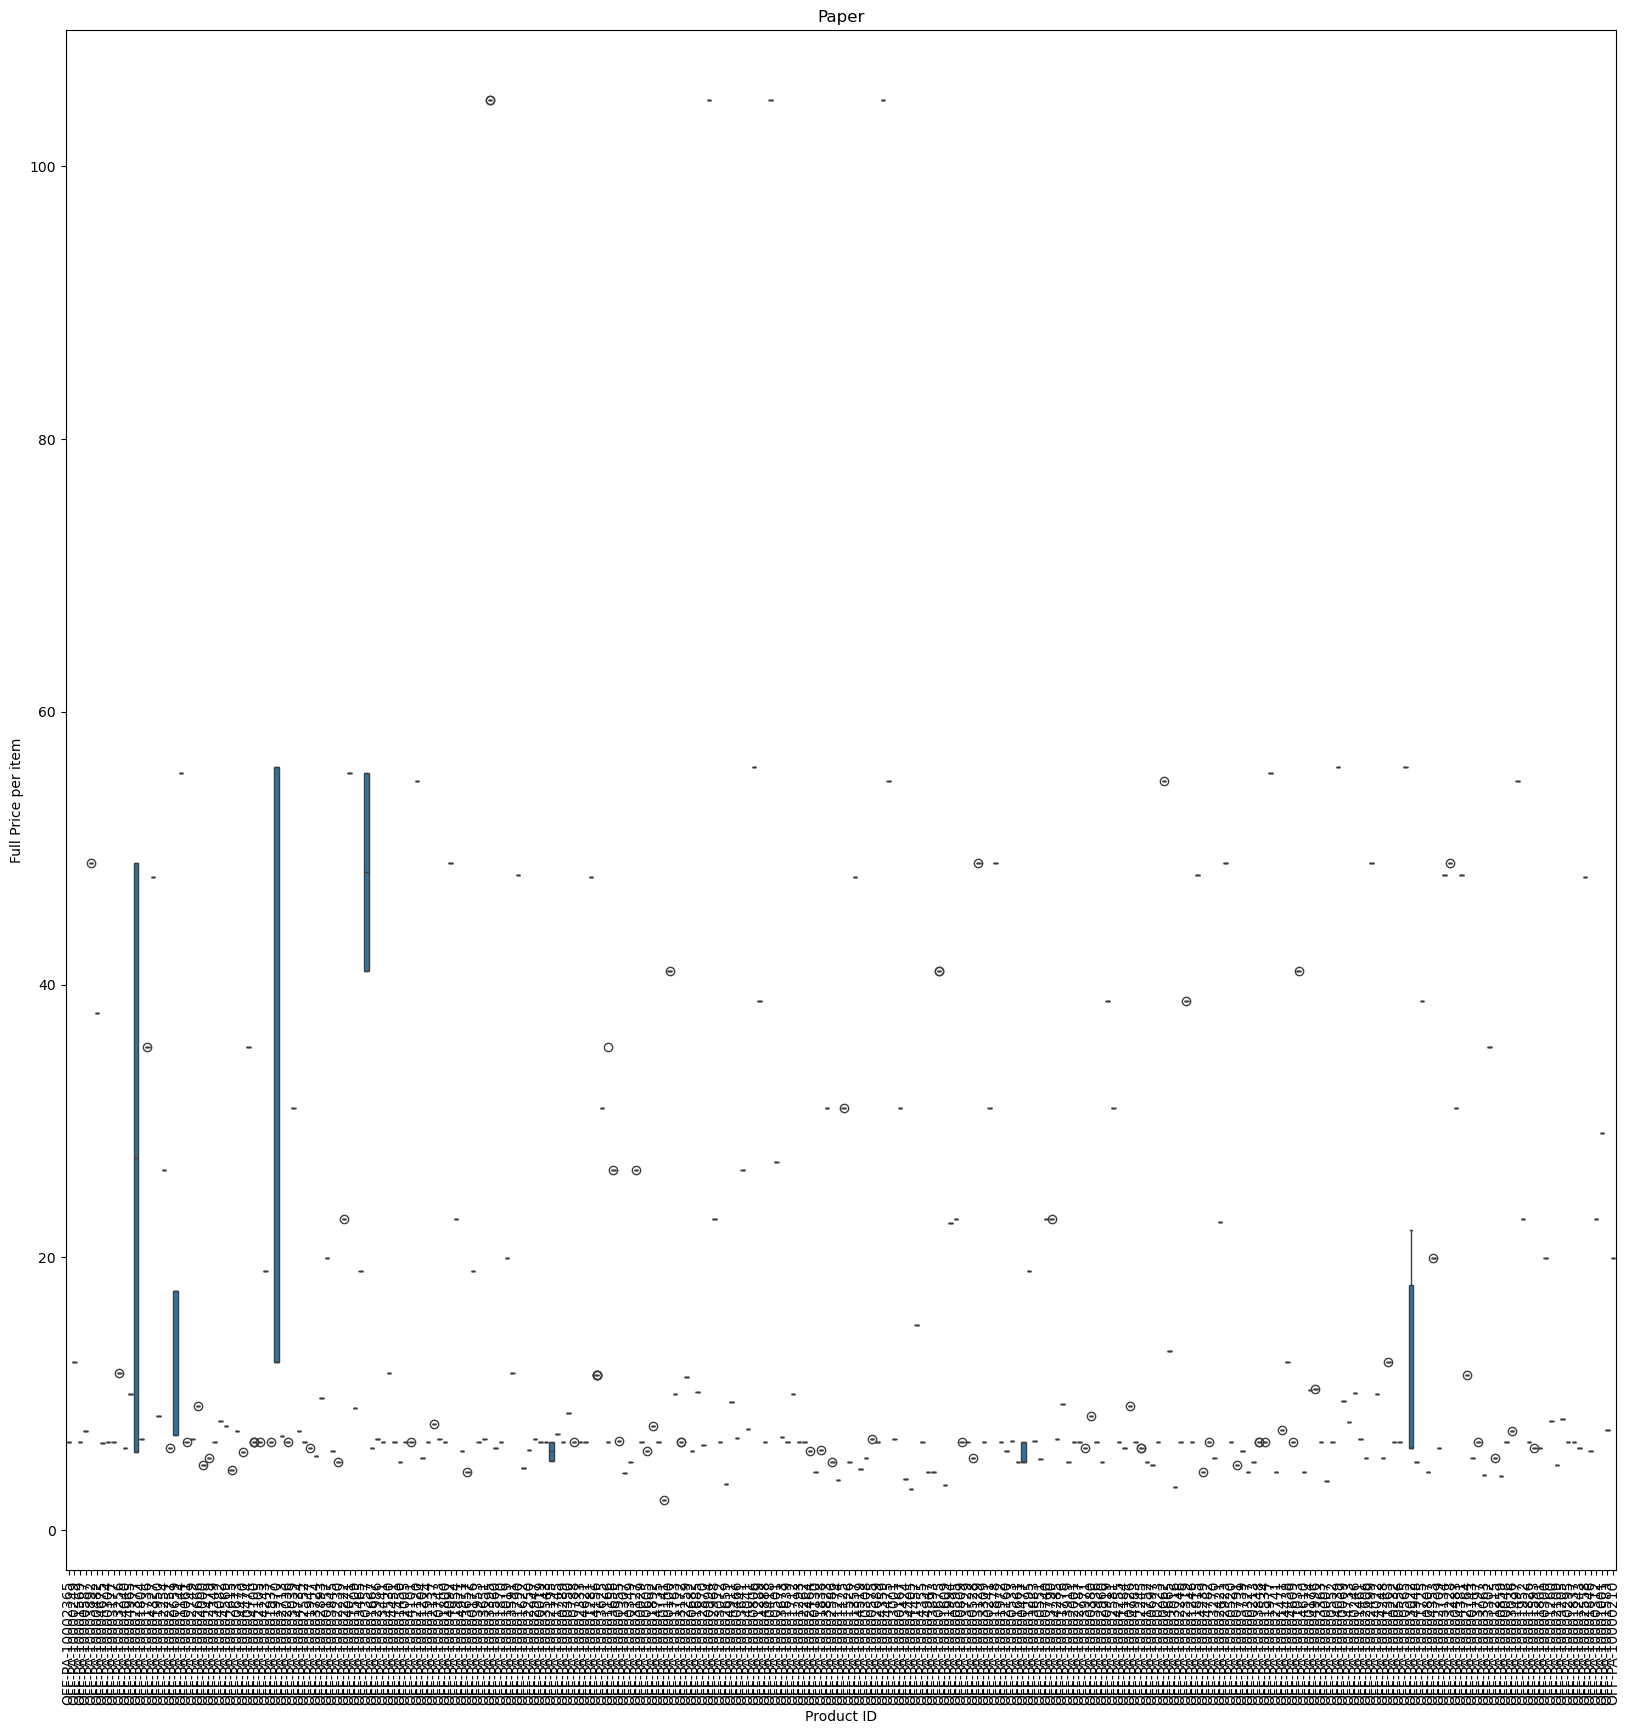

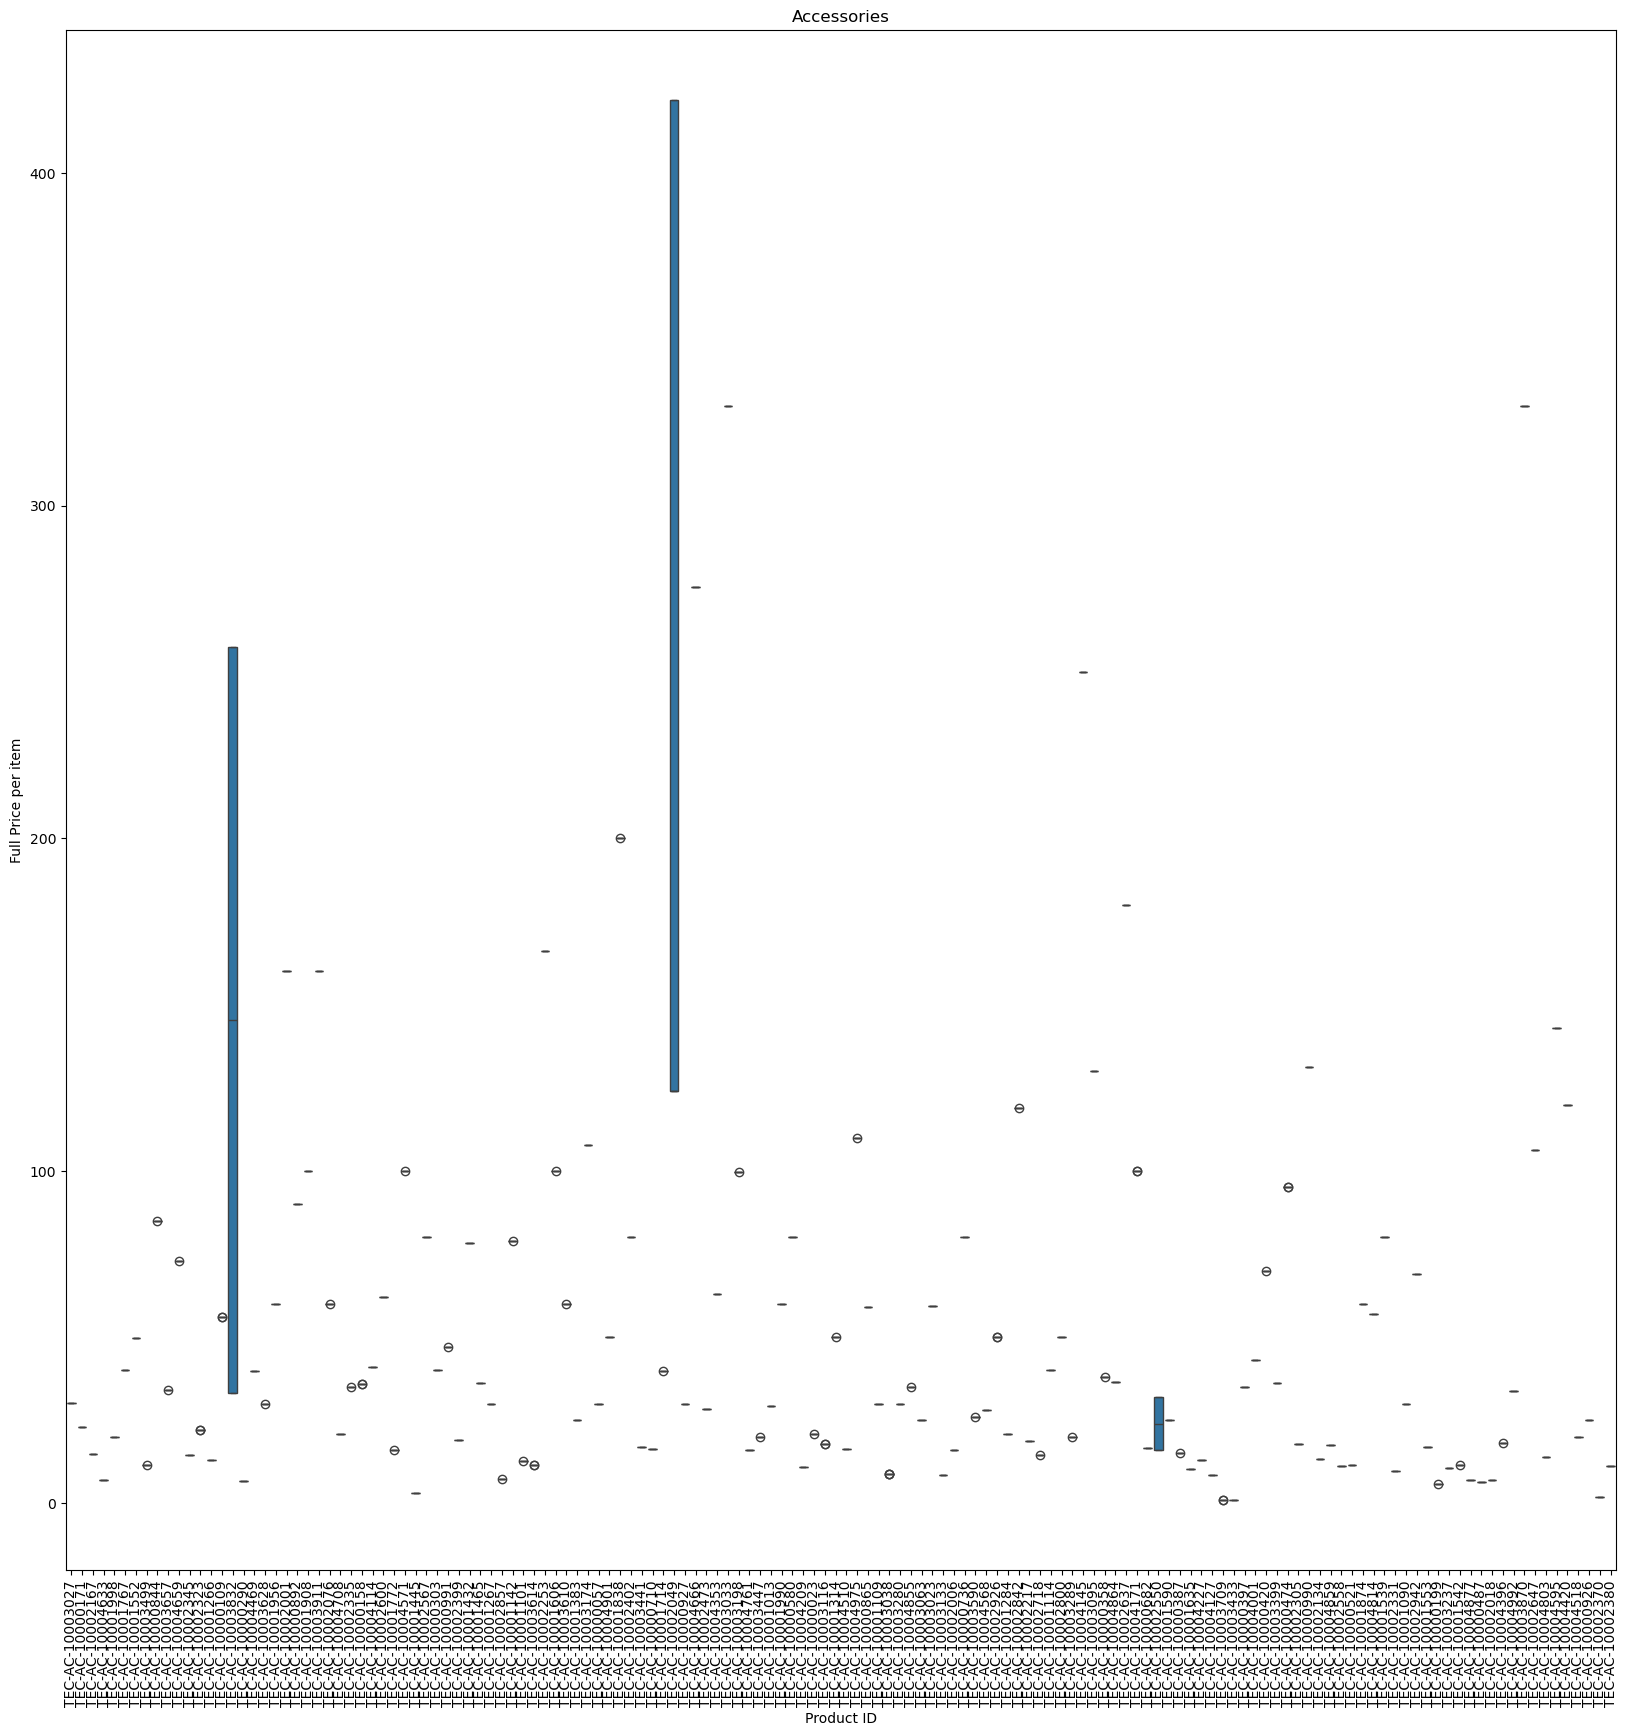

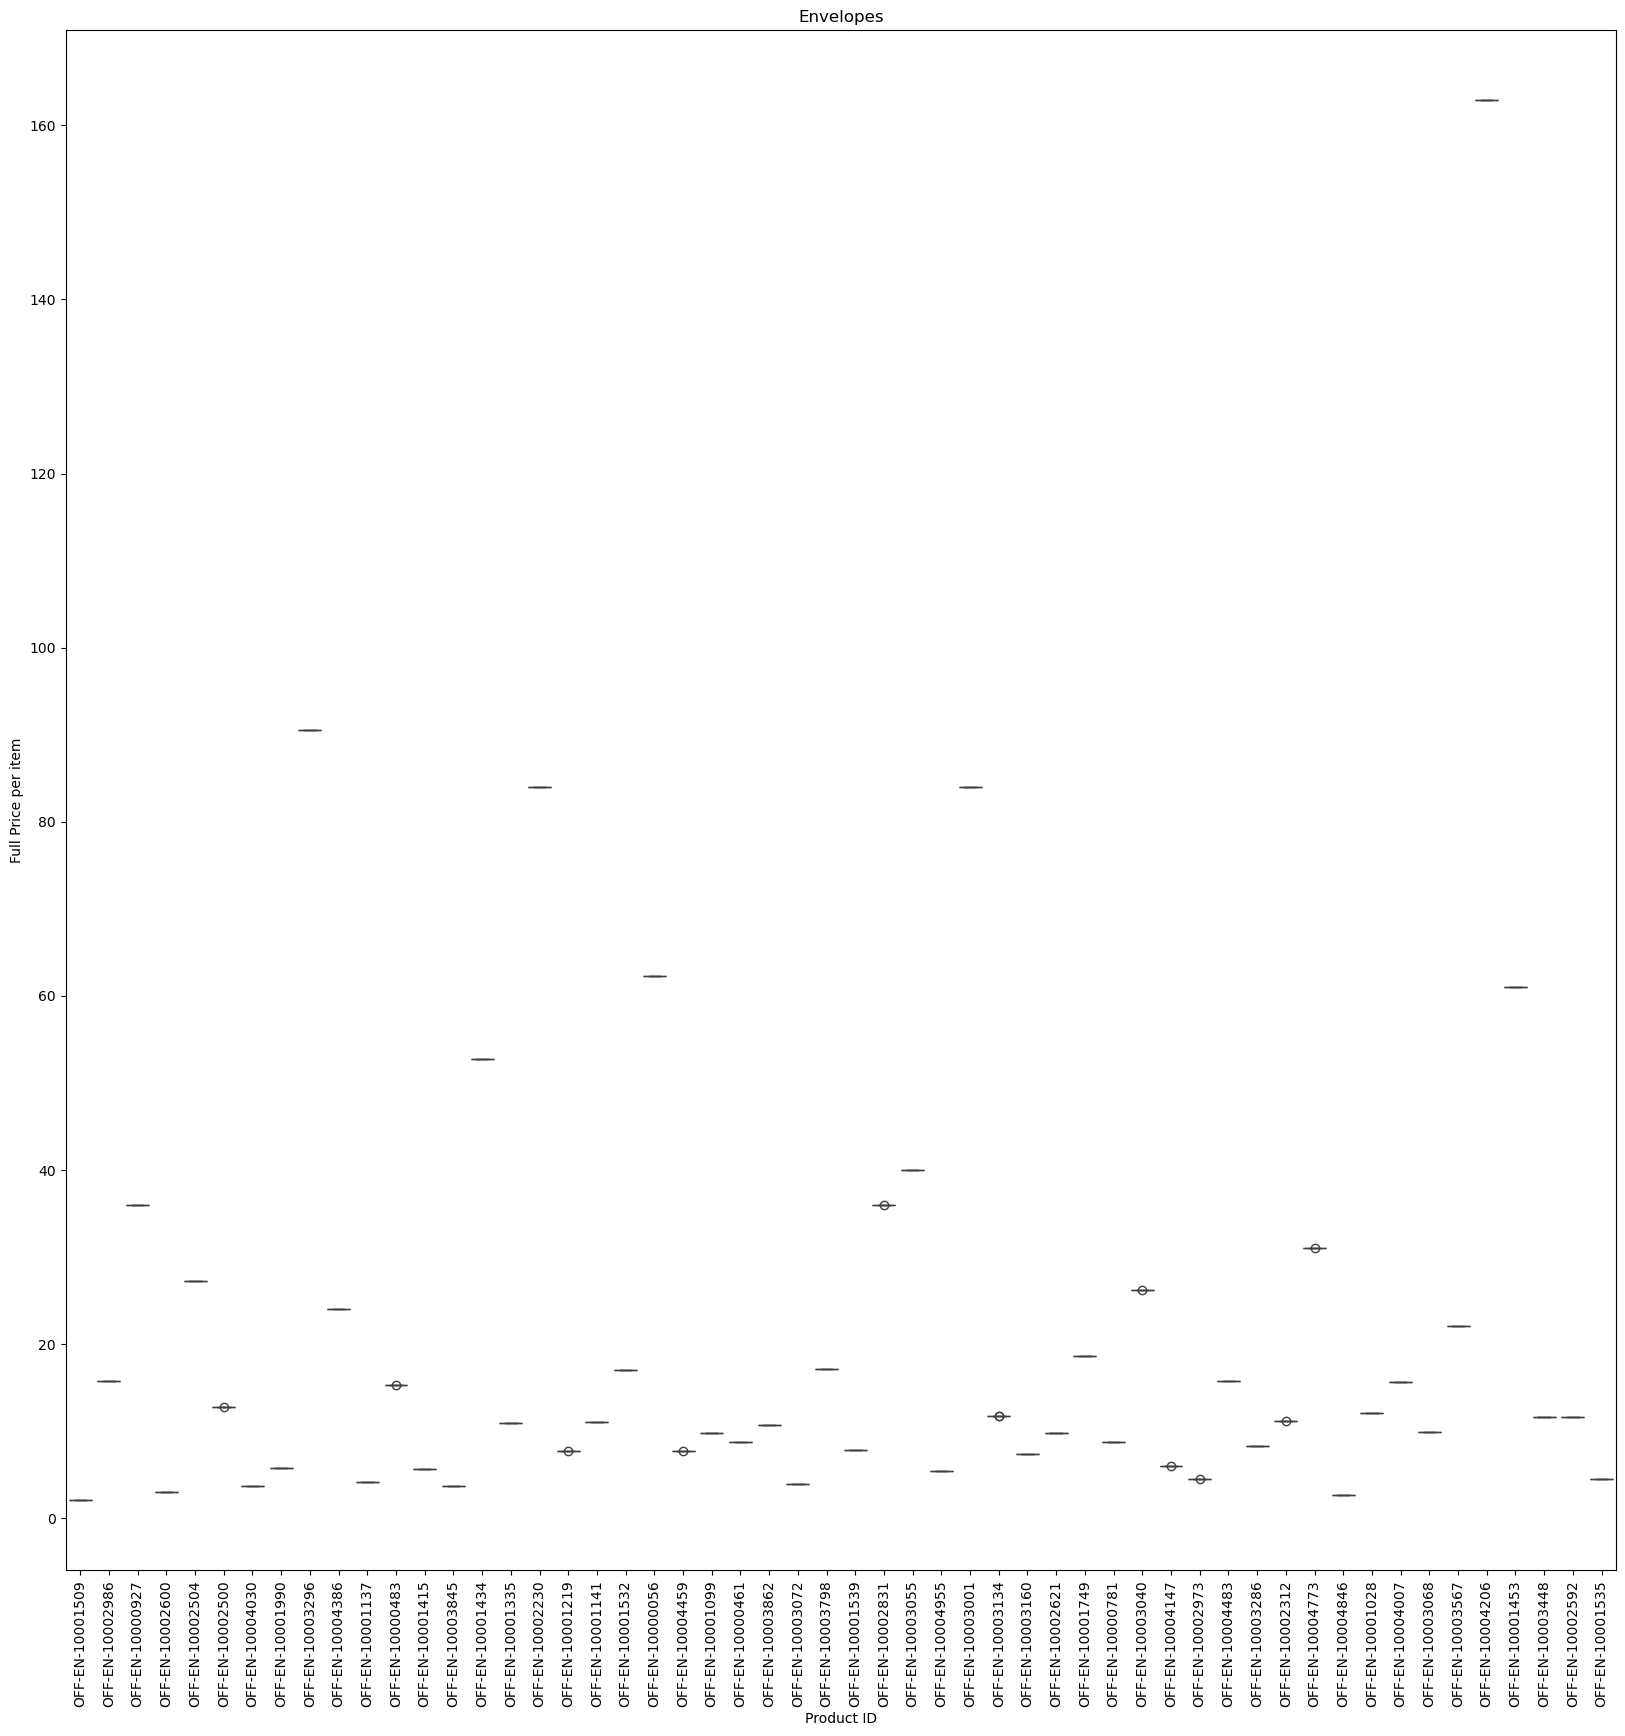

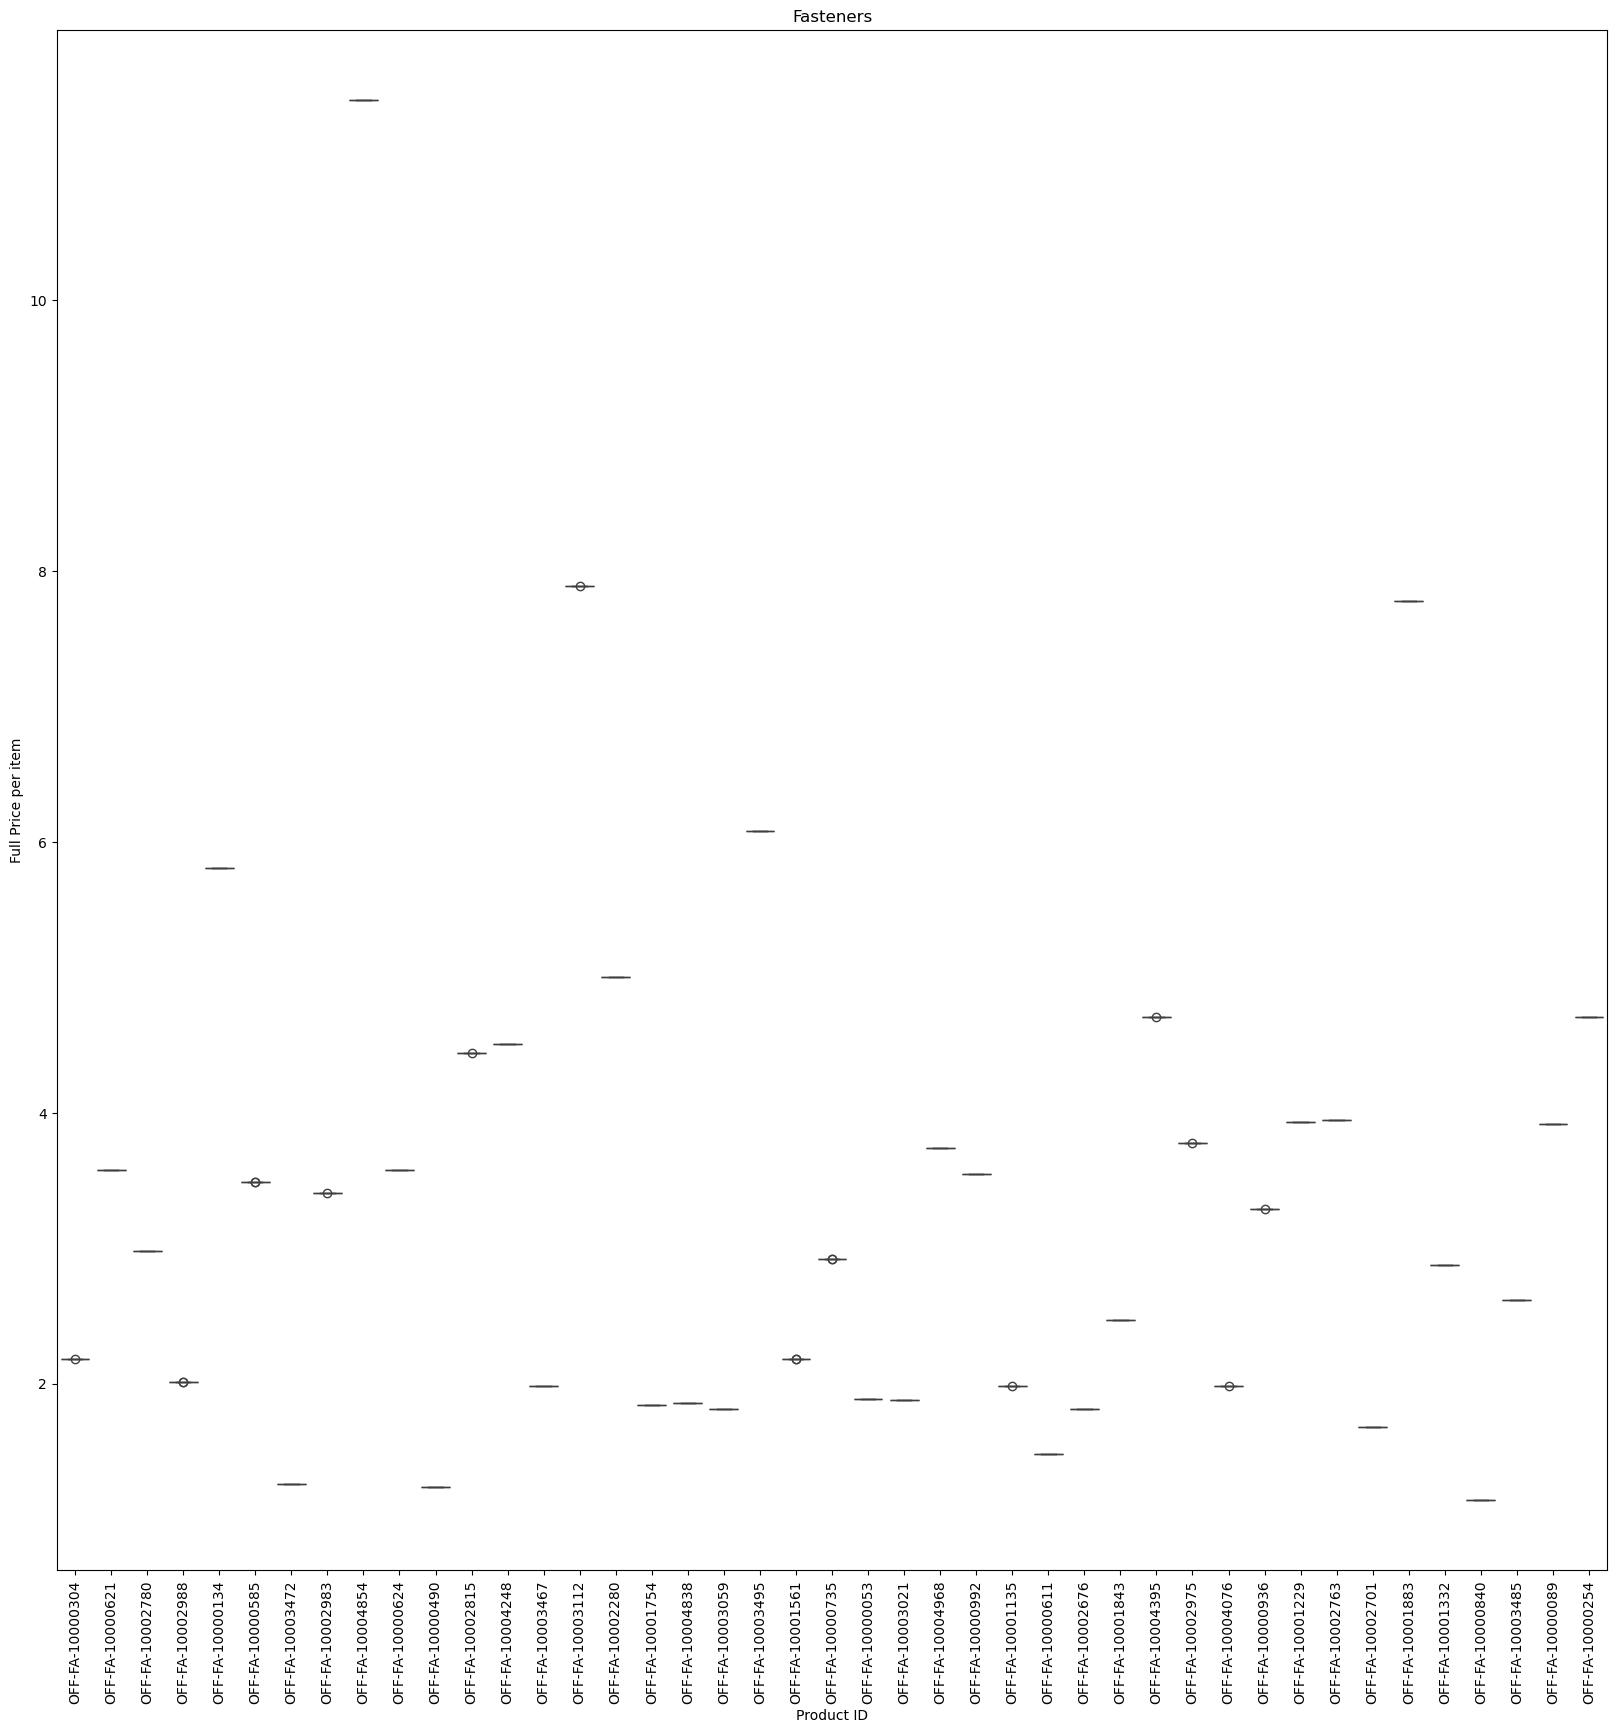

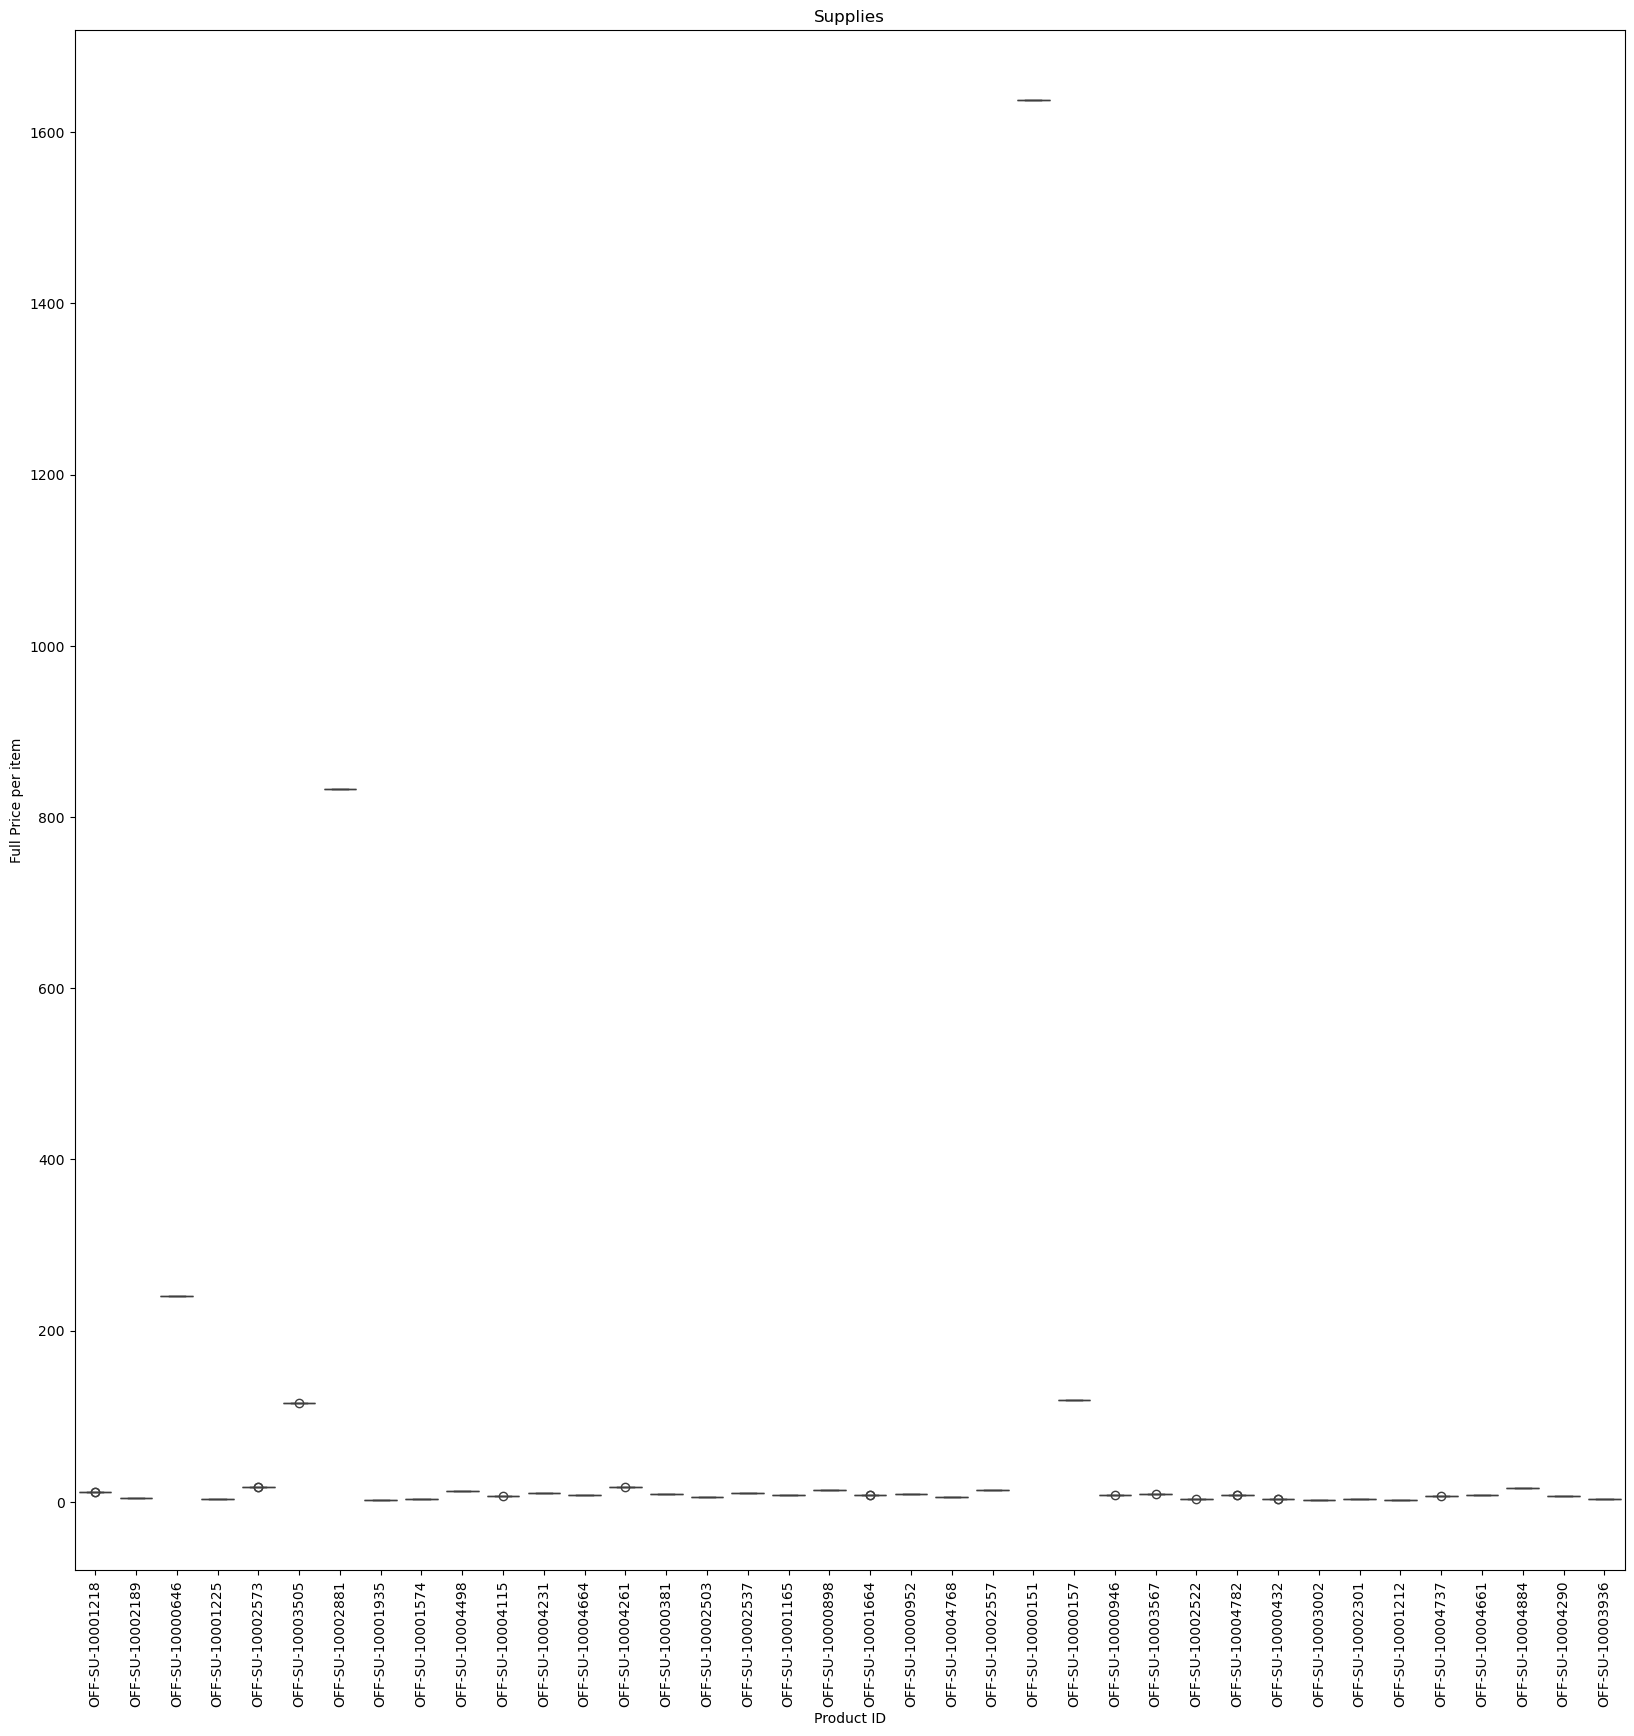

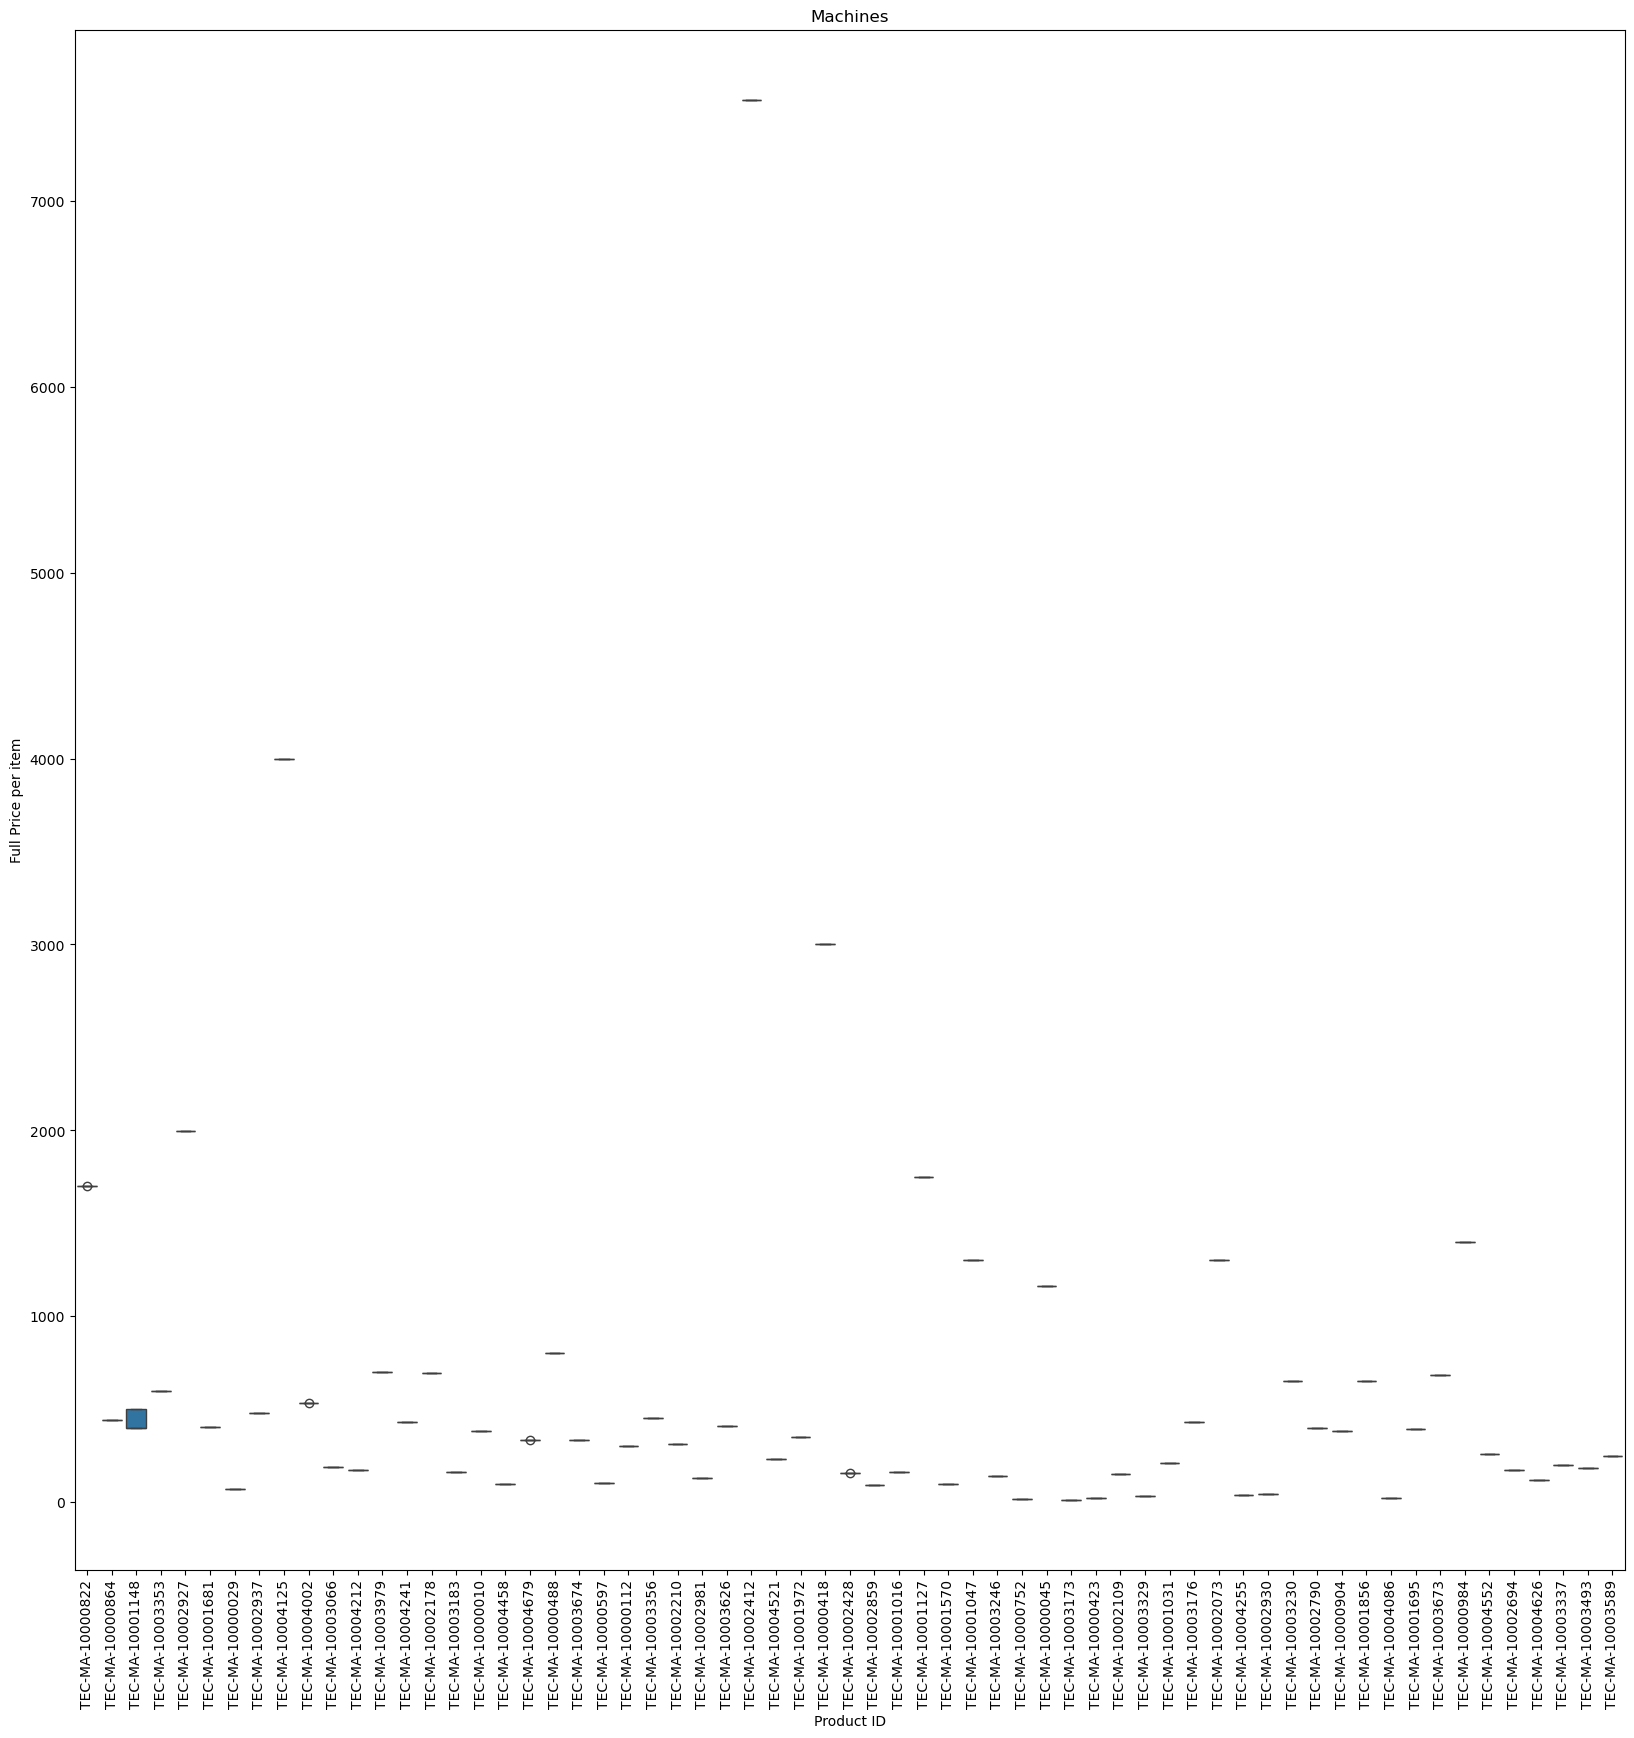

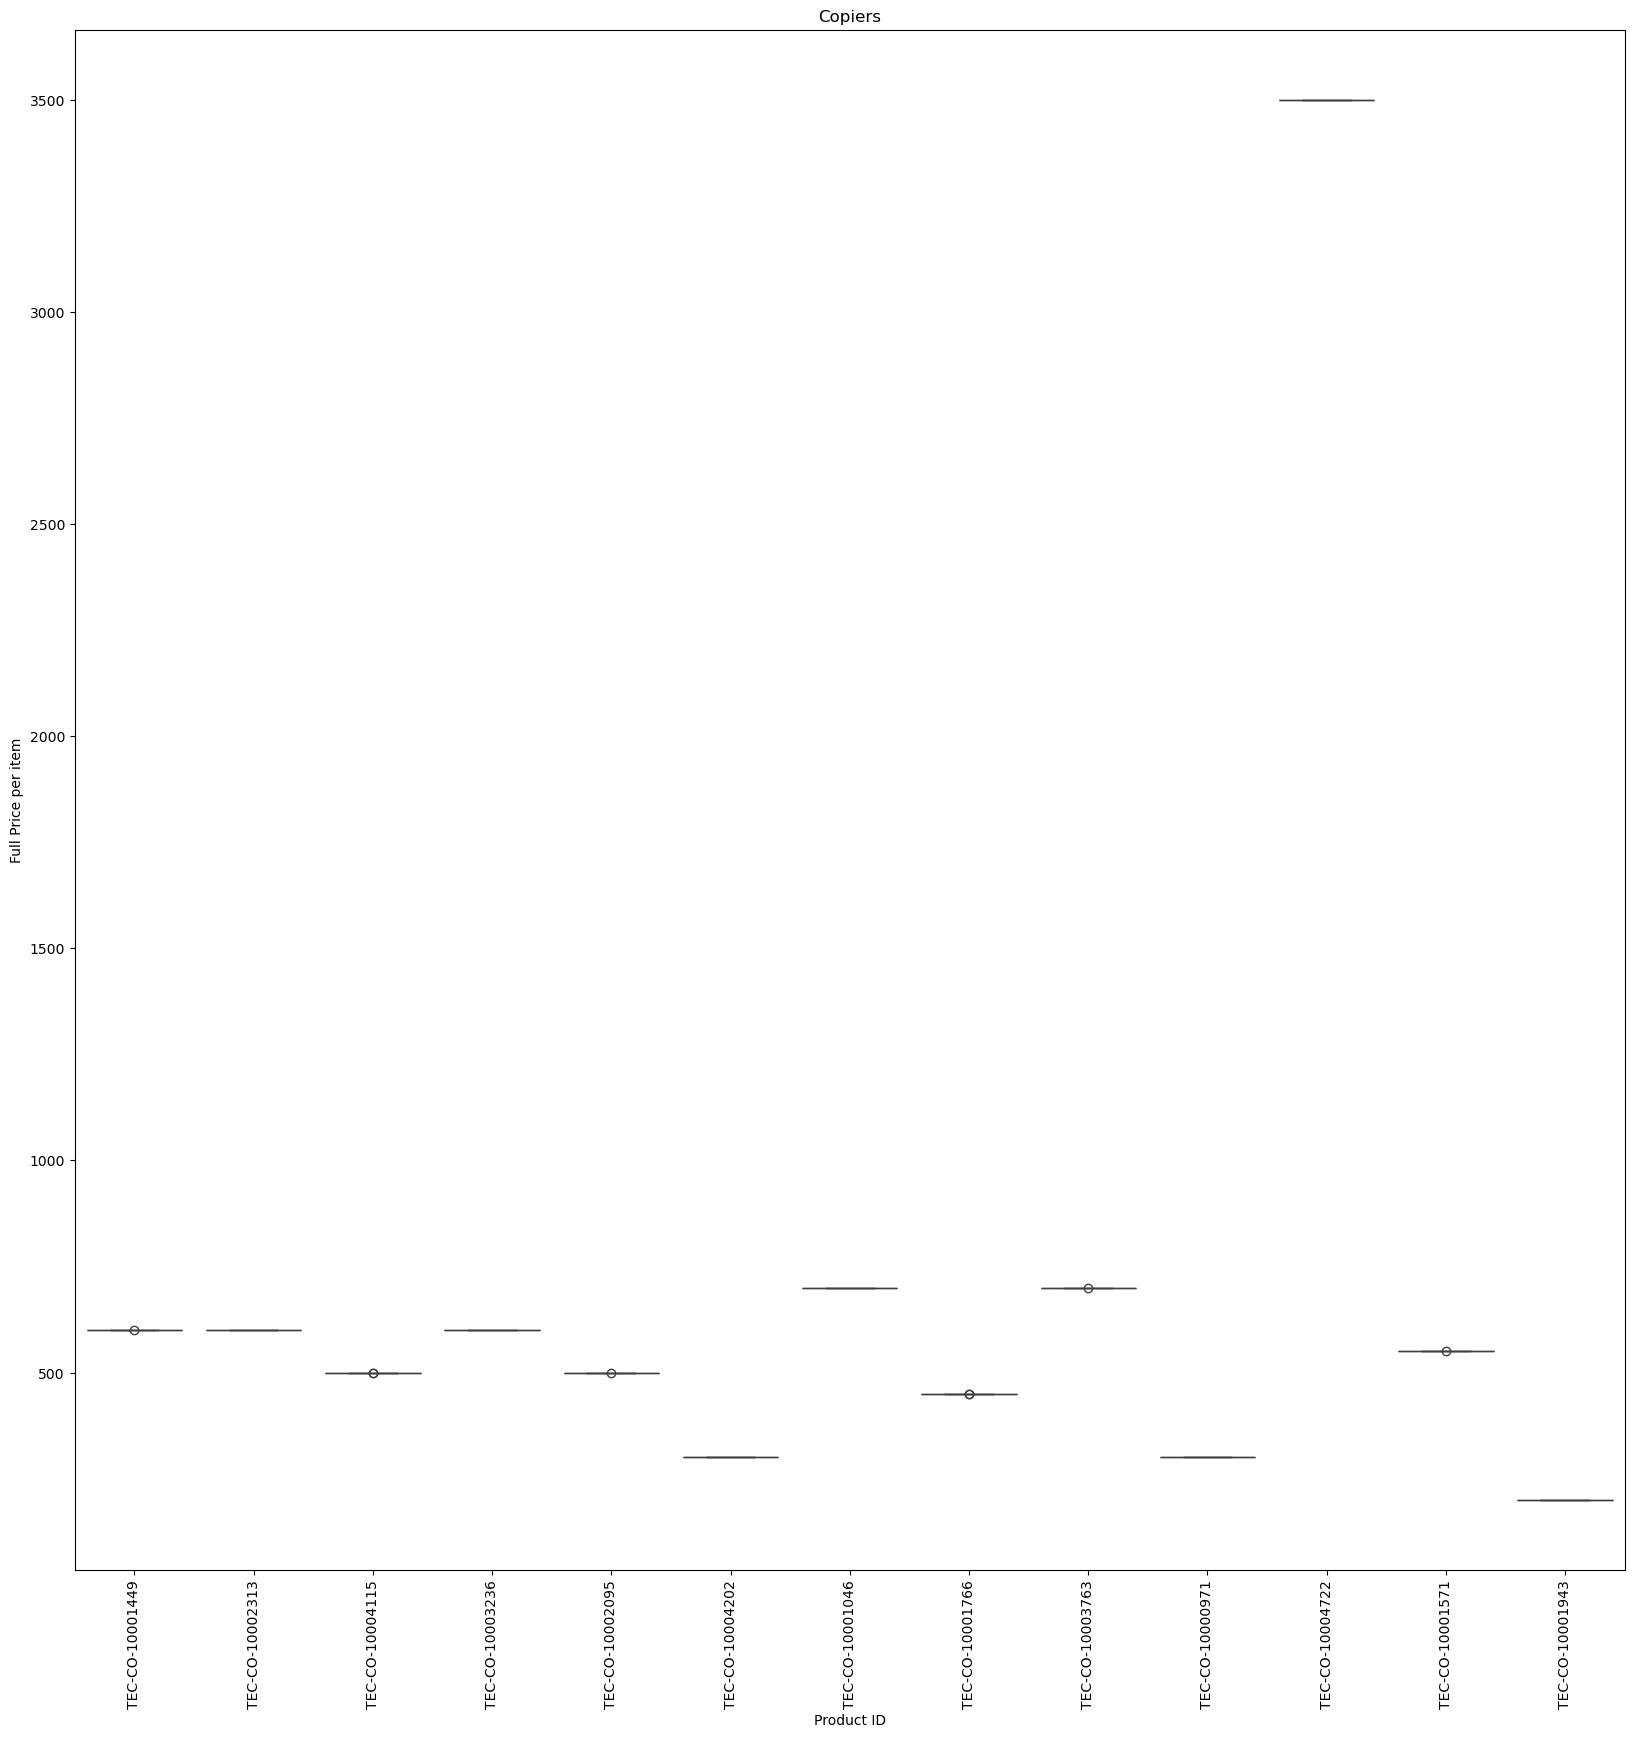

In [14]:
for sub_cat in df['Sub-Category'].unique():
    fig, ax = plt.subplots(figsize = (20, 20))
    plt.xticks(rotation = 90)
    sns.boxplot(data = df[df['Sub-Category'] == sub_cat], x = 'Product ID', y = 'Full Price per item')
    ax.set_title(sub_cat)